# Logistic Regression - Lead Scoring
By: Vikram Mathur

# Problem Statement
- Building a logistic regression model to assign a lead score of 0 to 100 to each lead such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


# Table Of Contents<br/>

[Loading Required Libraries](#SetupEnvironment)<br/><br/>
1. [**Step 1: Reading and Understanding Data**](#RUD)<br/>
    1.1 [Running Pandas Profiler](#RPP)<br/>
    

2. [**Step 2: Data Preparation & EDA**](#DP)<br/>
    2.1 [Removing Redundant Features](#RFCV)<br/>
    > 2.1.1 [Removing Features with Constant Values](#RFCV)<br/>
    > 2.1.2 [Checking & Removing Features with 95% Constant Values](#RF99CV)<br/>
    > 2.1.3 [Removing ID Features having all Unique values](#RIFUV)<br/>
    > 2.1.4 [Evaluating Features having High missing values](#EFMV)<br/>
    
    2.2 [Check for Duplicates](#CD)<br/>
    2.3 [Check & Treat Missing Values](#CTMV)<br/>
    2.4 [Check & Fix Datatypes](#CFD)<br/>
    2.5 [Outlier Analysis & Treatment](#OAT)<br/>
    2.6 [Numerical Features Analysis](#NFA)
    > 2.6.1 [Numerical Features - Univariate Analysis](#NFUA)<br/>
    > 2.6.2 [Correlation Analysis - Bivariate Analysis](#CA)<br/>
    > 2.6.3 [Numerical Features - Segmented Analysis](#NFSA)
    
    2.7 [Categorical Features Analysis](#CFA)<br/>
    > 2.7.1 [Categorical Features - Univariate Analysis](#CFUA)<br/>
    2.7.2 [Categorical Features - Bivariate Analysis](#CFBA)<br/>

3. [**Step 3: Feature Engineering - Data Preparation**](#FEDP)<br/>
    3.1 [Derived Metrics](#DM)<br/>
    3.2 [Dummy Encoding for Unordered Categorical Variables](#DC)<br/>


4. [**Step 4: Split Data into Training and Test Sets**](#split)<br/>


5. [**Step 5: Training the Model**](#train)<br/>
    5.1 [MinMax Scaling](#MMS)<br/>
    5.2 [RFE](#RFE)<br/>
    5.3 [Building model using statsmodel, for the detailed statistics](#STATS)


6. [**Step 6: Model Evaluation**](#RA)<br/>
    6.1 [Predictions](#Predictions)<br/>
    6.2 [ROC Curve](#ROC)<br/>
    6.3 [Finding Optimal Cutoff Point](#FOCP)<br/>
    6.4 [Assign Lead Score](#ALS)<br/>
    

7. [**Step 7: Predictions and Evaluation on the Test Set**](#MPTS)<br/>

<a id="SetupEnvironment"></a>
# Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd

import pandas_profiling as pp # pip install pandas-profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import math


#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# View max columns
pd.options.display.max_columns = None

<a id="RUD"></a>
# 1. Reading and Understanding Data

In [2]:
df_leads = pd.read_csv("Leads.csv")
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
df_leads.shape

(9240, 37)

In [4]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

  Data Interpretation for dataframe describe  
- Most of the features are categorical in nature.
- Lot of features have missing value that need to be treated before modelling.

In [5]:
df_leads.describe([0,0.05, 0.25,0.50,0.75,0.90,0.95,0.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
0%     579533.000000     0.000000     0.000000                     0.000000   
5%     582869.900000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
90%    650506.100000     1.000000     7.000000                  1380.000000   
95%    655404.050000     1.000000    10.000000                  1562.000000   
99%    659592.980000     1.000000    17.000000                  1840.610000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
0%                 0.000000                     7.000000   
5%                 0.000000                    12.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
90%                5.000000                    16.000000   
95%                6.000000                    17.000000   
99%                9.000000                    17.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
0%                      11.000000  
5%                      14.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
90%                     19.000000  
95%                     20.000000  
99%                     20.000000  
max                     20.000000

  Data Interpretation for dataframe describe  
-  Total Visits and Page Views Per Visit has outliers or extreme values.

<a id="PP"></a>
### 1.1 Running Pandas Profiler

Executing profiler and analyzing results.<br/>
Note: The profiler execution will take time. Kindly wait for the processing to complete.

In [6]:
profile = pp.ProfileReport(df_leads)
# Generate HTML file for easy viewing for later
profile.to_file(outputfile="df_leads_profile.html")
profile

<a id="DP"></a>
# 2. Data Preparation & EDA

<a id="RRF"></a>
<a id="RFCV"></a>
### 2.1 Removing Redundant Features
#### 2.1.1 Removing Features with Constant Values
 - Pandas Profiler suggests the following features having a constant value
     1. **_Get updates on DM Content_** - has constant value No
     - **_I agree to pay the amount through cheque_** - has constant value No
     - **_Magazine_** - has constant value No
     - **_Receive More Updates About Our Courses_** - has constant value No
     - **_Update me on Supply Chain Content_** - has constant value No

In [7]:
const_features_lst = ['Get updates on DM Content',
                           'I agree to pay the amount through cheque',
                           'Magazine',
                           'Receive More Updates About Our Courses',
                           'Update me on Supply Chain Content']
df_leads.drop(const_features_lst, axis=1, inplace= True)

<a id="RF99CV"></a>
#### 2.1.2 Removing Features with 95% Constant Value
 - Pandas Profiler suggests the following featuers having a constant value frequency of 95%. Hence we can remove these features. Checking the business sense of these features to take a decision
    1. **_Digital Advertisement_** - has constant value No, frequency as 9237 (about 100%)
    - **_Do Not Call_** - has constant value No, frequency as 9238 (about 100%)
    - **_Newspaper_** - has constant value No, frequency as 9239 (about 100%)
    - **_Newspaper Article_** - has constant value No, frequency as 9238 (about 100%)
    - **_Search_** - has constant value No, frequency as 9226 (99.8%)
    - **_Through Recommendations_** - has constant value No, frequency as 9233 (99.9%)
    - **_X Education Forums_** - has constant value No, frequency as 9339 (about 100%)
    - **_What matters most to you in choosing a course_** - has value "Better Career Prospects" frequency as 70.6% and Missing Data is 29.3%. So, the column has mostly the constant value of "Better Career Prospects", hence the column can be removed.
    

**_Country_** - has 73.5% value as India and 23.3% missing data taking the total to 96.8% if we consider that we will impute the column with the mode. About 3% data is another Other countries. Hence, the column can be dropped.

In [8]:
const_features_95_lst = ['Digital Advertisement', 'Do Not Call', 'Newspaper',
                        'Newspaper Article', 'Search', 'Through Recommendations', 'X Education Forums',
                        'What matters most to you in choosing a course', 'Country']
df_leads.drop(const_features_95_lst, axis=1, inplace= True)

<a id="RIFUV"></a>
#### 2.1.3 Evaluating ID Features having all Unique values
 - Pandas Profile and data dictionary suggests that ProspectID and Lead Number are unique identifiers. Removing Prospect ID

In [9]:
df_leads.drop(['Prospect ID'], axis=1, inplace= True)

In [10]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            7802 non-null object
How did you hear about X Education        7033 non-null object
What is your current occupation           6550 non-null object
Tags                                      5887 non-null object
Lead Quality                              4473 non-null object
Lead Profile

<a id="EFMV"></a>
#### 2.1.4 Evaluating Features having High missing values
 -  Removing columns having High missing values

In [11]:
#selecting numerical variables
numerical_features = list(df_leads.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['Lead Number']))
print("Numerical Columns: ", numerical_features)

#selecting categorical vairables
categorical_features = list(df_leads.select_dtypes(include='object').columns)
print("\nCategorical Columns: ", categorical_features)

Numerical Columns:  ['Asymmetrique Activity Score', 'TotalVisits', 'Page Views Per Visit', 'Asymmetrique Profile Score', 'Converted', 'Total Time Spent on Website']

Categorical Columns:  ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview', 'Last Notable Activity']


##### Marking the value of "Select" as null for all categorical features

In [12]:
for i in categorical_features:
    df_leads.loc[df_leads[i].str.lower() == 'select', i] = np.nan
    
# missing values
round((df_leads.isnull().sum()/len(df_leads)) * 100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              74.19
City                                      39.71
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score                45.65
A free copy of Mastering The Interview  

In [13]:
# Missing values
round((df_leads.isnull().sum()/len(df_leads)) * 100,0)

Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Specialization                            37.0
How did you hear about X Education        78.0
What is your current occupation           29.0
Tags                                      36.0
Lead Quality                              52.0
Lead Profile                              74.0
City                                      40.0
Asymmetrique Activity Index               46.0
Asymmetrique Profile Index                46.0
Asymmetrique Activity Score               46.0
Asymmetrique Profile Score                46.0
A free copy of Mastering The Interview     0.0
Last Notable 

  Data Interpretation of Missing values in Columns  
 - Following columns to be dropped for having more than 30% missing values
    - Lead Quality
    - Asymmetrique Activity Index
    - Asymmetrique Profile Index
    - Asymmetrique Activity Score
    - Asymmetrique Profile Score
    - How did you hear about X Education
    - Lead Profile
    - City
    - Tags
    - Specialization - Not removing this feature as it seems to have some business impact. To be determined.

In [14]:
df_leads.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
               'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
              'How did you hear about X Education','Lead Profile','City','Tags'], axis=1, inplace= True)

In [15]:
df_leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                      NaN   
1             Email Opened                      NaN   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                      NaN   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

<a id="CD"></a>
### 2.2 Check for Duplicates

In [16]:
#Checking for Duplicates without the Lead Number column
print(df_leads.duplicated().value_counts())

False    9240
dtype: int64


In [17]:
#Checking for Duplicates without the Lead Number column
print(df_leads.drop('Lead Number',axis=1).duplicated().value_counts())

# Printing the duplicated rows removing the Prospect ID variable
df_leads.loc[df_leads.drop('Lead Number',axis=1).duplicated(), :]
df_leads.shape

False    7387
True     1853
dtype: int64


(9240, 13)

In [18]:
# Removing the duplicates keeping the first entry.
lst_subset = list(set(df_leads.columns) - set(['Lead Number']))
df_leads.drop_duplicates(subset=lst_subset, inplace=True)
df_leads.shape

(7387, 13)

<a id="CTMV"></a>
### 2.3 Check & Treat Missing Values

##### Remove the ROWS  having some percentage missing values

In [19]:
# count the number of rows having >=30% missing values
print("30% missing values")
print("Count:", len(df_leads[df_leads.isnull().sum(axis=1) >= len(df_leads.columns)*0.3].index))
print("Percentage:", round(100*(len(df_leads[df_leads.isnull().sum(axis=1) >= len(df_leads.columns)*0.3].index) / len(df_leads.index)),2),"%")

30% missing values
Count: 64
Percentage: 0.87 %


In [20]:
# count the number of rows having >=40% missing values
print("40% missing values")
print("Count:", len(df_leads[df_leads.isnull().sum(axis=1) >= len(df_leads.columns)*0.4].index))
print("Percentage:", round(100*(len(df_leads[df_leads.isnull().sum(axis=1) >= len(df_leads.columns)*0.4].index) / len(df_leads.index)),2),"%")

40% missing values
Count: 0
Percentage: 0.0 %


In [21]:
# count the number of rows having >=50% missing values
print("50% missing values")
print("Count:", len(df_leads[df_leads.isnull().sum(axis=1) >= len(df_leads.columns)*0.5].index))
print("Percentage:", round(100*(len(df_leads[df_leads.isnull().sum(axis=1) >= len(df_leads.columns)*0.5].index) / len(df_leads.index)),2),"%")

50% missing values
Count: 0
Percentage: 0.0 %


Retaining only the rows having <= 30% NaNs

In [22]:
df_leads = df_leads[df_leads.isnull().sum(axis=1) <= len(df_leads.columns)*0.3]

# look at the missing values summary again
round((df_leads.isnull().sum()/len(df_leads)) * 100,1)

Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.2
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              0.7
Specialization                            23.3
What is your current occupation           25.9
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [23]:
df_leads.shape

(7323, 13)

##### Handling Missing Data for Continuous Numerical Features

In [24]:
# Custom function for plotting histogram
def histogram(df, col_name):
    plt.figure(figsize=(6,3))
    plt.hist(df[col_name],alpha=0.7, ec='black')
    plt.xlabel(col_name)
    plt.ylabel('frequency')
    plt.title(col_name + ' Frequency')
    plt.plot()

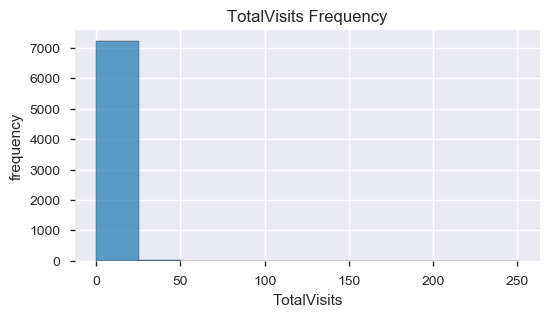

In [25]:
histogram(df_leads, 'TotalVisits')

<font color='blue'>Data Interpretation of TotalVisits Histogram  
- The data has outliers which need to be treated.
- We should use the median to treat missing values

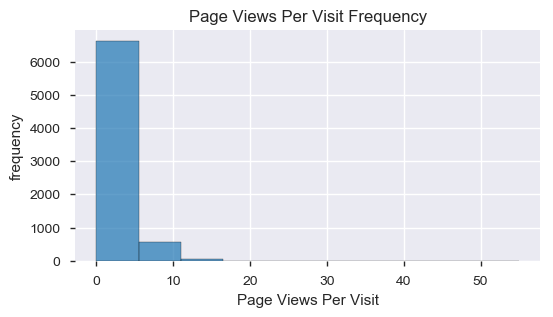

In [26]:
histogram(df_leads, 'Page Views Per Visit')

<font color='blue'>Data Interpretation of Page Views Per Visit Histogram  
- The data has outliers which need to be treated.
- We should use the median to treat missing values

In [27]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].median(),inplace=True)
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(),inplace=True)

##### Handling Missing Data for Categorical Variables
Visualizing the frequency plot for variables having missing value

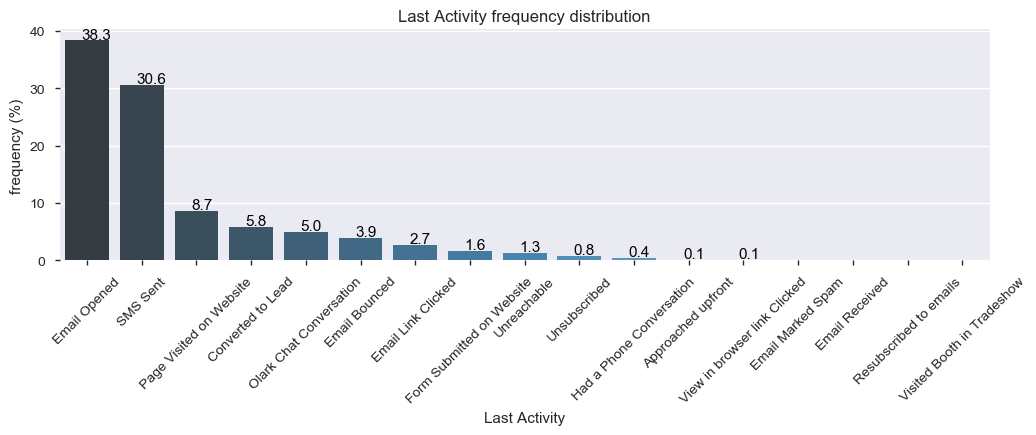

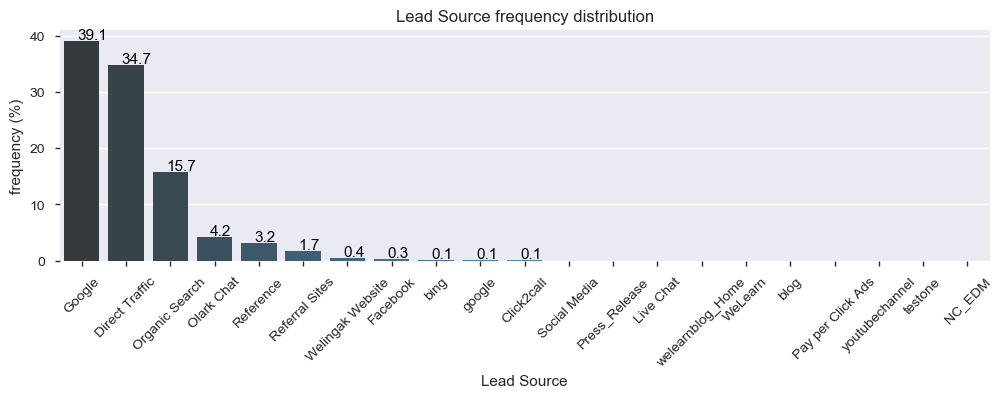

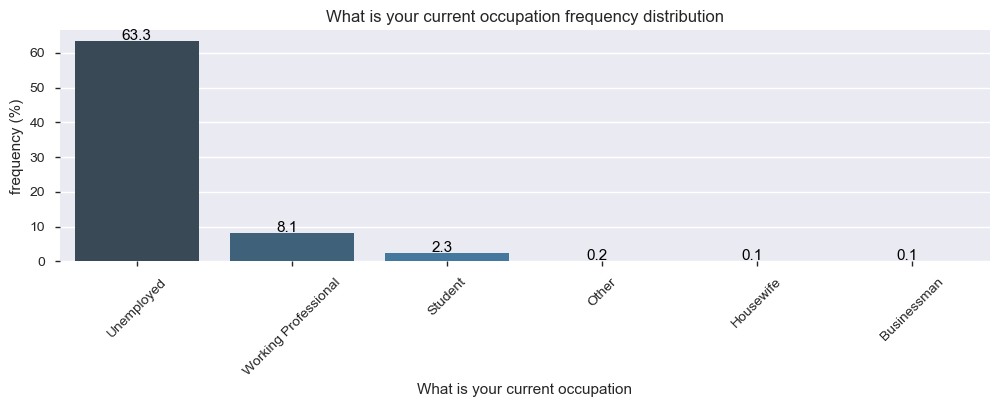

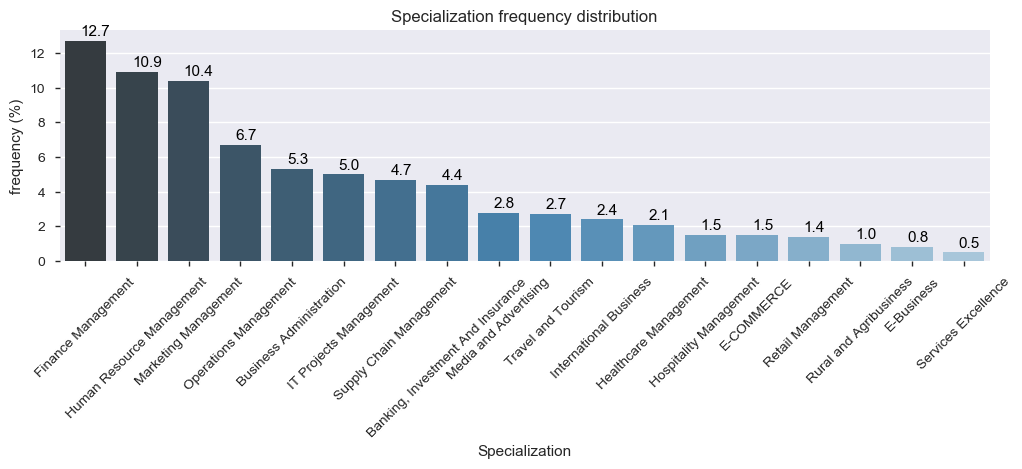

In [28]:
lst_nullval_feat = df_leads.columns[df_leads.isnull().any()]
lst_nullval_feat = list(set(lst_nullval_feat).intersection(set(categorical_features)))
# preparing frequency distribution plot to know the number of occurences
def freq_dist_categorical_feature(df, feature):
    plt.figure(figsize=(12,3))
    #ser = round(df[feature].value_counts()/(len(df[feature])-df[feature].isnull().sum())*100,1)  
    ser = round(df[feature].value_counts()/len(df[feature])*100,1)  
    plt.title(feature + " frequency distribution")
    ax = sns.barplot(x=ser.index, y=ser.values, orient="v", palette=("Blues_d"))
    for j in ax.patches:
        if (j.get_height() != 0):
            ax.text(j.get_x()-0.1 + j.get_width()/2., j.get_y()+0.3 + j.get_height(), str(j.get_height()), fontsize=11, color='black')   
    plt.ylabel('frequency (%)')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()
    
for i in range(0,len(lst_nullval_feat)):
    freq_dist_categorical_feature(df_leads, lst_nullval_feat[i])

<font color='blue'>Data Interpretation of Missing Values in Categorical Variables  
- What is your current occupation
	- Has about 26% missing values
	- The value Umemployed has highest occurence. Frequency 63.3.2% and the next value of "Working Professional" is 8.1%.
	- Impute missing value by mode.


- Lead Source
	- Has 0.2% missing data
    - "Google" value has 38.3% frequency occurence and "Direct Traffic" as 34.7%
    - Since the missing data is quite small in % we can impute it with mode value


- Specialization                      
    - Has 23% missing values
    - The mode value "Finance Management" has 12.7% frequency. The data seems fairly balanced and hence imputing with mode does not seem correct.
    - Imputing with a new value - "unknown". This column will be deleted once dummy variables are created and if this appears there.


- Last Activity
	- Has 1% missing values
	- The mode value frequency is 38.3%
	- Since the missing data is quite small in % we can impute it with mode

In [29]:
# Replacing missing values with mode
df_leads['What is your current occupation'].fillna(df_leads['What is your current occupation'].mode()[0],inplace=True)
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0],inplace=True)
df_leads['Last Activity'].fillna(df_leads['Last Activity'].mode()[0],inplace=True)

# Replacing missing values with "unknown" value
df_leads['Specialization'].fillna('unknown',inplace=True)

In [30]:
# missing values
round((df_leads.isnull().sum()/len(df_leads)) * 100,1)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [31]:
df_leads.reset_index(drop=True,inplace=True)

In [32]:
#Re-running the profiler to view review post the clean up
profile = pp.ProfileReport(df_leads)
profile

<a id="CFD"></a>
### 2.4 Check & Fix Data Types

In [33]:
# Based on profiler report and review of columns taking action on following columns
#Imputing 0 and 1 for boolean columns instead of No and Yes.
def change_to_bool(col):
    df_leads.loc[df_leads[col] == 'No', [col]] = '0'
    df_leads.loc[df_leads[col] == 'Yes', [col]] = '1'
    df_leads[col] = df_leads[col].astype('int16').astype('bool')
        
change_to_bool("A free copy of Mastering The Interview")
change_to_bool("Do Not Email")
df_leads['Converted'] = df_leads['Converted'].astype('int16').astype('bool')

In [34]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 13 columns):
Lead Number                               7323 non-null int64
Lead Origin                               7323 non-null object
Lead Source                               7323 non-null object
Do Not Email                              7323 non-null bool
Converted                                 7323 non-null bool
TotalVisits                               7323 non-null float64
Total Time Spent on Website               7323 non-null int64
Page Views Per Visit                      7323 non-null float64
Last Activity                             7323 non-null object
Specialization                            7323 non-null object
What is your current occupation           7323 non-null object
A free copy of Mastering The Interview    7323 non-null bool
Last Notable Activity                     7323 non-null object
dtypes: bool(3), float64(2), int64(2), object(6)
memory usage: 593.6+ KB


In [35]:
#selecting numerical variables
numerical_features = list(df_leads.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['Lead Number']))
print("Numerical Columns: ", numerical_features)

#selecting categorical vairables
categorical_features = list(df_leads.select_dtypes(include='object').columns)
print("\nCategorical Columns: ", categorical_features)

#selecting binary vairables
binary_features = list(df_leads.select_dtypes(include='bool').columns)
print("\nBinary Columns: ", binary_features)

Numerical Columns:  ['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']

Categorical Columns:  ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Last Notable Activity']

Binary Columns:  ['Do Not Email', 'Converted', 'A free copy of Mastering The Interview']


<a id="OAT"></a>
### 2.5 Outlier Analysis & Treatment

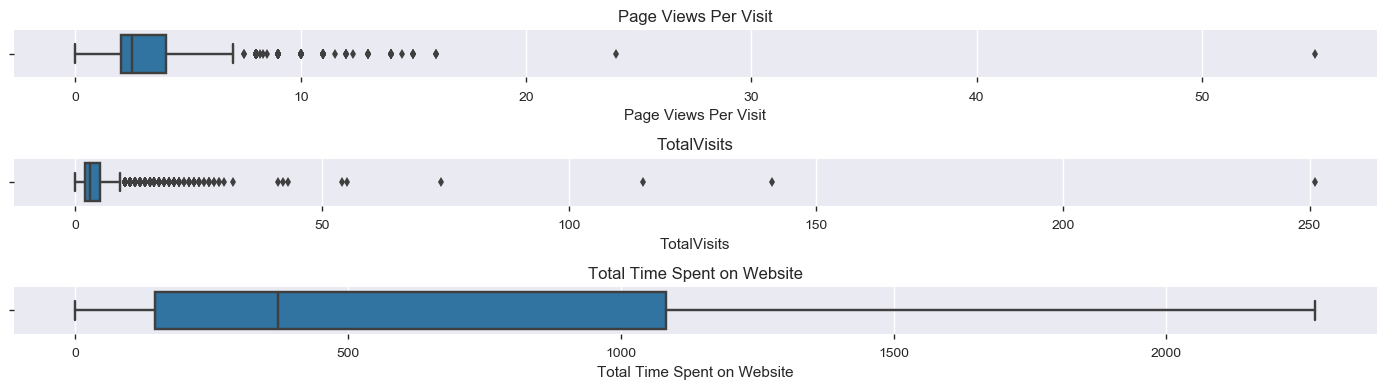

In [36]:
# Generic function to plot outliers based on dataframe and numeric columns
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols), figsize=(14,len(cols)+1))
    for i in range(0,len(cols)):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
    
check_outliers_continuous(df_leads, numerical_features)

In [37]:
def treat_outliers(df, col):
    q1, q3 = np.percentile(df[col].dropna(), [5, 95])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    #print(col, lower_bound, upper_bound)
    df[col][df[col] <= lower_bound] = lower_bound
    df[col][df[col] >= upper_bound] = upper_bound

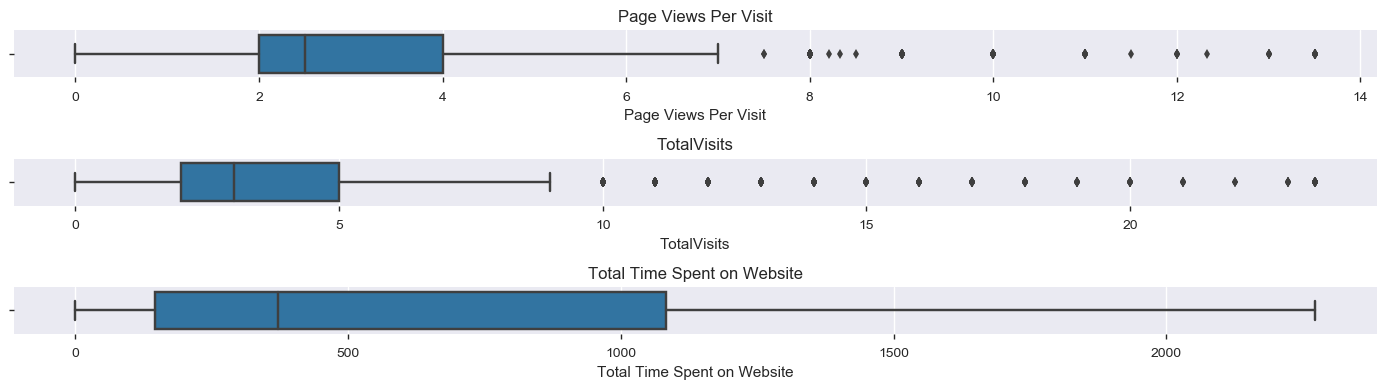

In [38]:
for i in numerical_features:
    treat_outliers(df_leads, i)

check_outliers_continuous(df_leads, numerical_features)

<a id="NFA"></a>
### 2.6 Numerical Feature Analysis

<a id="NFUA"></a>
#### 2.6.1 Numerical Features - Univariate Analysis

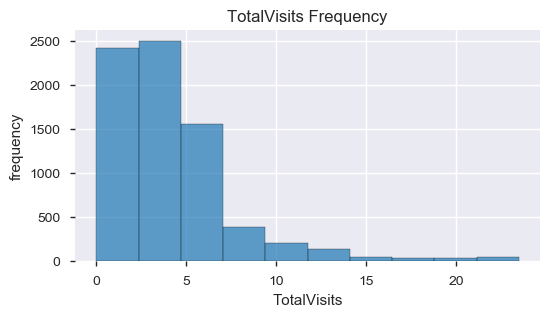

In [39]:
histogram(df_leads, 'TotalVisits')

<font color='blue'>Data Interpretation for TotalVisits  
- Between the range of 0 to 7 seems to have the maximum density

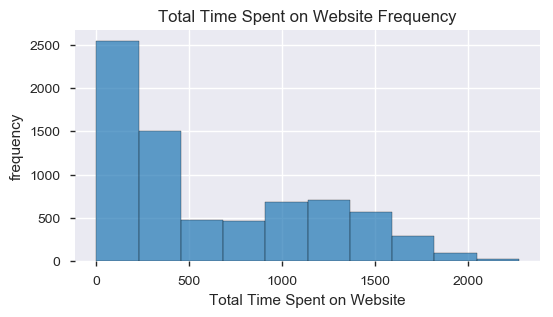

In [40]:
histogram(df_leads, 'Total Time Spent on Website')

<font color='blue'>Data Interpretation for Total Time Spent on Website Frequency  
- 0 to 500 range has the highest density.
- Values between 900 to 1600 have a healthy frequency.

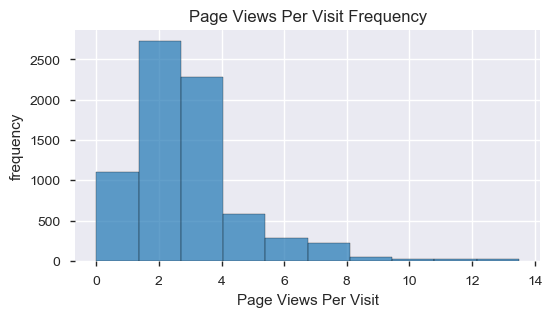

In [41]:
histogram(df_leads, 'Page Views Per Visit')

<font color='blue'>Data Interpretation for Page Views Per Visit  
- Between the range of 1 to 4 is the maximum density

<a id="CA"></a>
#### 2.6.2 Correlation Analysis - Bivariate Analysis

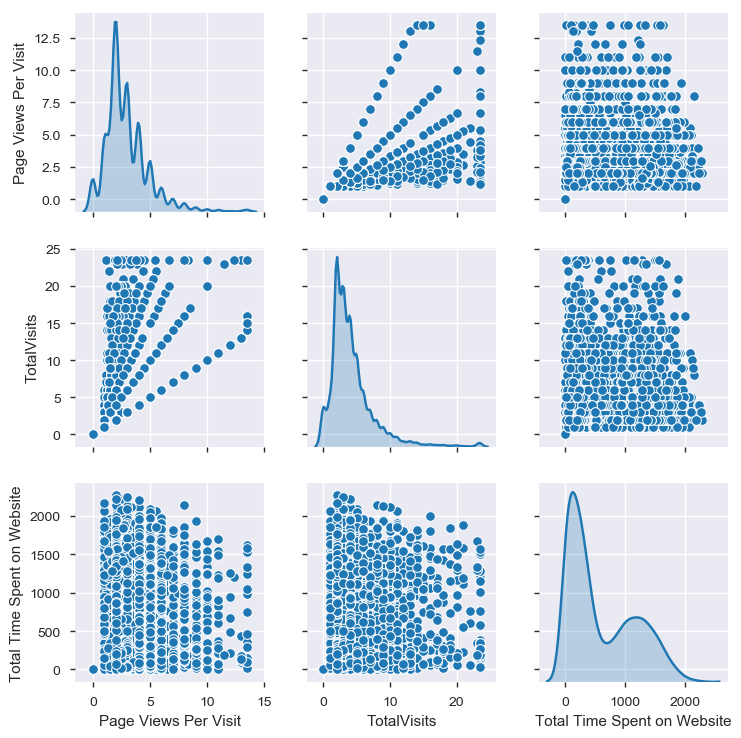

In [42]:
# Plotting pair plot to view correlation for numerical features
sns.pairplot(df_leads[numerical_features], diag_kind = "kde")
plt.show()

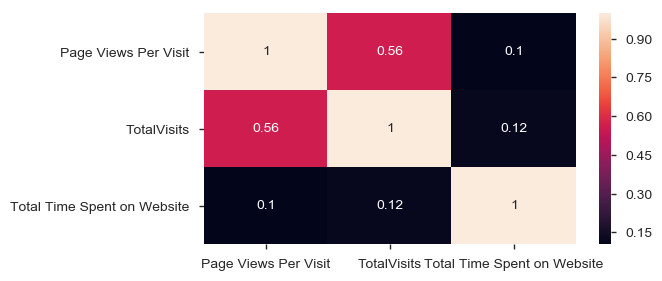

In [43]:
#plotting a heat map to view correlation
plt.figure(figsize=(6,3))
sns.heatmap(df_leads[numerical_features].corr(),annot=True)
plt.show()

<font color='blue'>Data Interpretation for Correlation Analysis  
 - "TotalVisits" and "Page Views Per Visit" have a positive correlation of 0.56

<a id="NFSA"></a>
#### 2.6.3 Numerical Features - Segmented Analysis

In [44]:
#Generic reusable function for plots
def dist_continuous_numeric_univariate_analysis(col):
    # Cut the window in 2 parts
    f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 5), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.suptitle("Continuous Numeric Variable - " + col + " Distribution", size=14, y=1.01) 
    # Add a graph in each part
    sns.boxplot(df_leads.query('Converted == 0')[col].dropna(), color="lightgreen", ax=ax1)
    sns.distplot(df_leads.query('Converted == 0')[col].dropna(), color="green", ax=ax3)
    ax1.title.set_text(col + " for Non-Converted Leads")
    ax3.set(xlabel=col)
    ax3.set(ylabel='Density')
    # Remove x axis name for the boxplot
    ax1.set(xlabel='')

    # Add a graph in each part
    sns.boxplot(df_leads.query('Converted == 1')[col].dropna(), color="lightsalmon", ax=ax2)
    sns.distplot(df_leads.query('Converted == 1')[col].dropna(), color="red", ax=ax4)
    ax2.title.set_text(col + " for Converted Leads")
    ax4.set(xlabel=col)
    ax4.set(ylabel='Density')
    # Remove x axis name for the boxplot
    ax2.set(xlabel='')
    plt.tight_layout()
    plt.show()

In [45]:
# Plotting BINS
def plot_bar(ser_T0, ser_T1, label):
    f,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    f.suptitle("Ordered Categorical Variable (BINS) - " + label + " Distribution", size=14, y=1.01)
    sns.barplot(x=ser_T0.index, y=ser_T0.values, color="green", ax=ax[0])
    ax[0].title.set_text(label + " Bins for Non-Converted Leads")
    ax[0].set(xlabel=label + " Bins")
    ax[0].tick_params(axis='x', labelrotation=45)
    ax[0].set(ylabel='Frequency')
    for i in ax[0].patches:
        if (i.get_height() != 0):
            ax[0].text(i.get_x()+0.20, i.get_y() + i.get_height()+0.15, str(int(i.get_height())) + "%", fontsize=12, color='black')


    sns.barplot(x=ser_T1.index, y=ser_T1.values, color="red", ax=ax[1])
    ax[1].title.set_text(label + " Bins for Converted Leads")
    ax[1].set(xlabel=label + " Bins")
    ax[1].tick_params(axis='x', labelrotation=45)
    ax[1].set(ylabel='Frequency')
    for i in ax[1].patches:
        if (i.get_height() != 0):
            ax[1].text(i.get_x()+0.20, i.get_y() + i.get_height()+0.15, str(int(i.get_height())) + "%", fontsize=12, color='black')

    plt.show()

# Function to Create Bins and Plot
def plot_bins_univariate_analysis(col):
    # Create bins on the main dataframe so that the BINS for both Converted and Non-Converted are same.
    bins_main = pd.cut(df_leads[col], 10, precision = 0).value_counts().sort_index().index
    bins_lst = []
    for i in bins_main.tolist():
        bins_lst.append((i.left, i.right))
    bins = pd.IntervalIndex.from_tuples(bins_lst)
    
    # Target = 0 Bins
    bins_T0 = pd.cut(df_leads.query('Converted == 0')[col].dropna(), bins, 10, precision=0)
    bins_T0 = np.round((bins_T0.value_counts().sort_index()/len(bins_T0.dropna()))*100,2)

    # Target = 1 Bins
    bins_T1 = pd.cut(df_leads.query('Converted == 1')[col].dropna(), bins, 10, precision=0)
    bins_T1 = np.round((bins_T1.value_counts().sort_index()/len(bins_T1.dropna()))*100,2)
    
    plot_bar(bins_T0, bins_T1, col)

In [46]:
def num_univariate_anaysis_kde(col):
    fig = plt.figure(figsize=(14,5))
    sns.kdeplot(df_leads.query('Converted == 0')[col].dropna(), label="Not Converted Leads", color="red")
    sns.kdeplot(df_leads.query('Converted == 1')[col].dropna(), label="Converted Leads", color="green")
    plt.title(col + " Distribution based on Converted and Non-Converted Leads")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

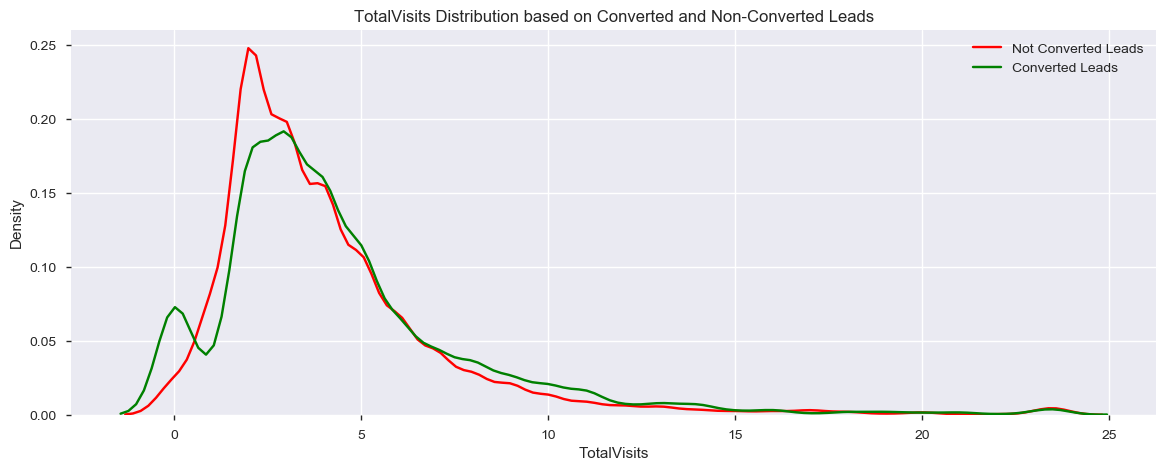

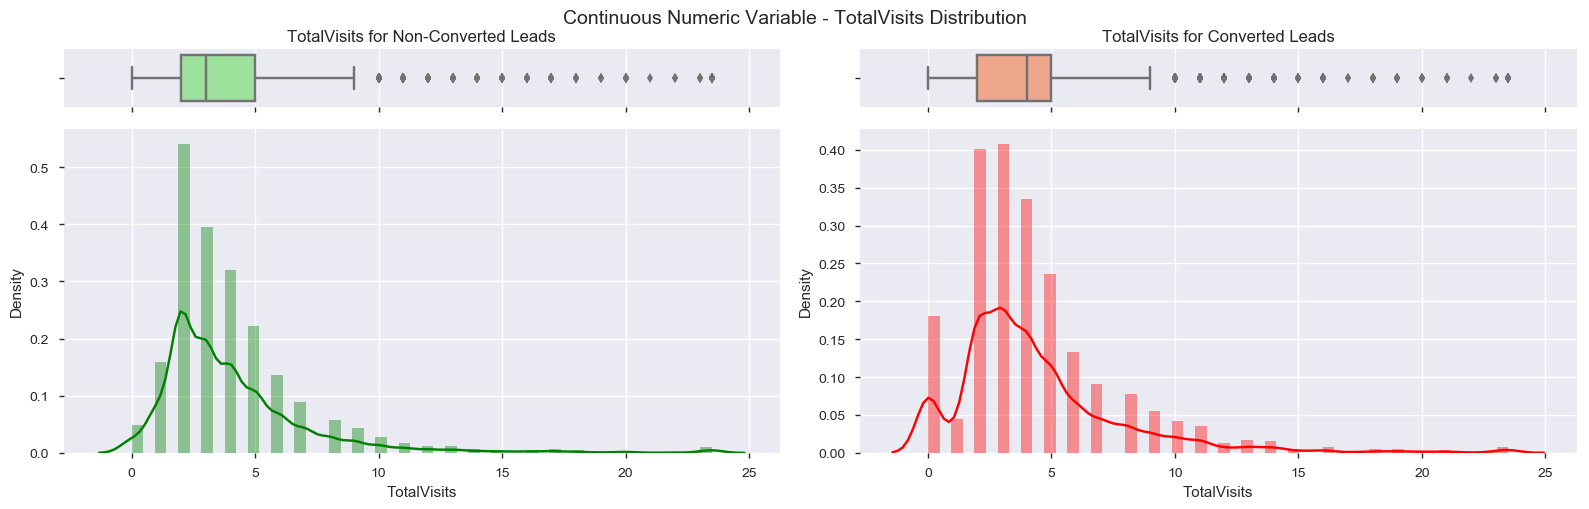

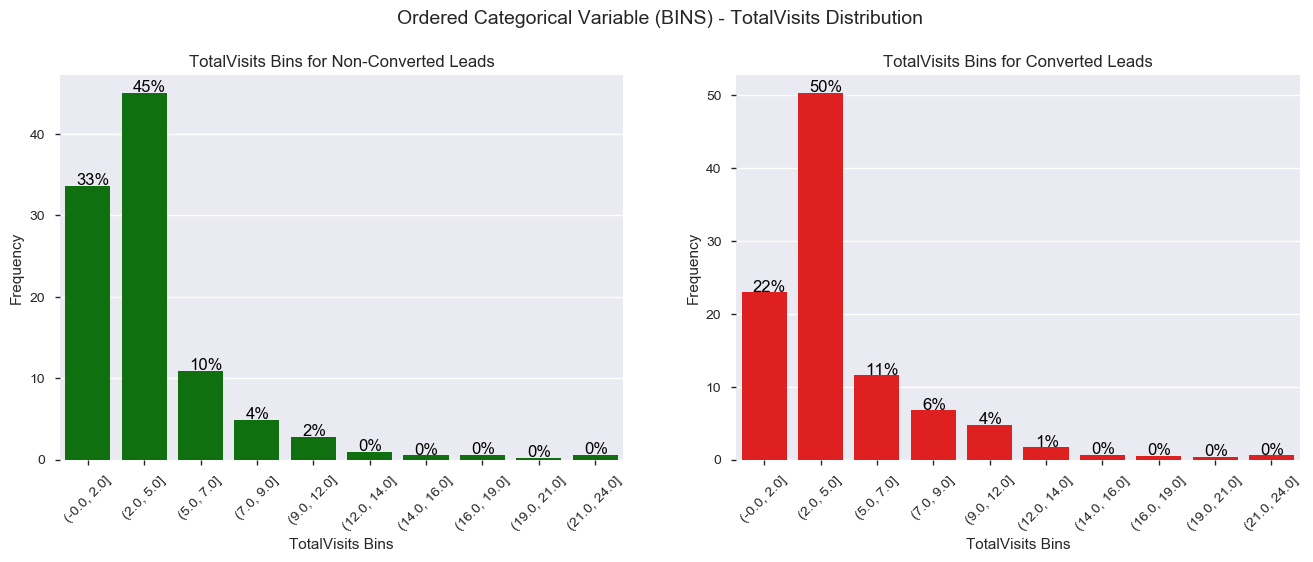

In [47]:
num_univariate_anaysis_kde("TotalVisits")
dist_continuous_numeric_univariate_analysis("TotalVisits")
plot_bins_univariate_analysis("TotalVisits")

<font color='blue'>Data Interpretation for TotalVisits Segmented Univariate Analysis  
- The TotalVisits feature does not have much difference between the converted and not converted density distributions
- The values in the bins for both converted and not converted is similar

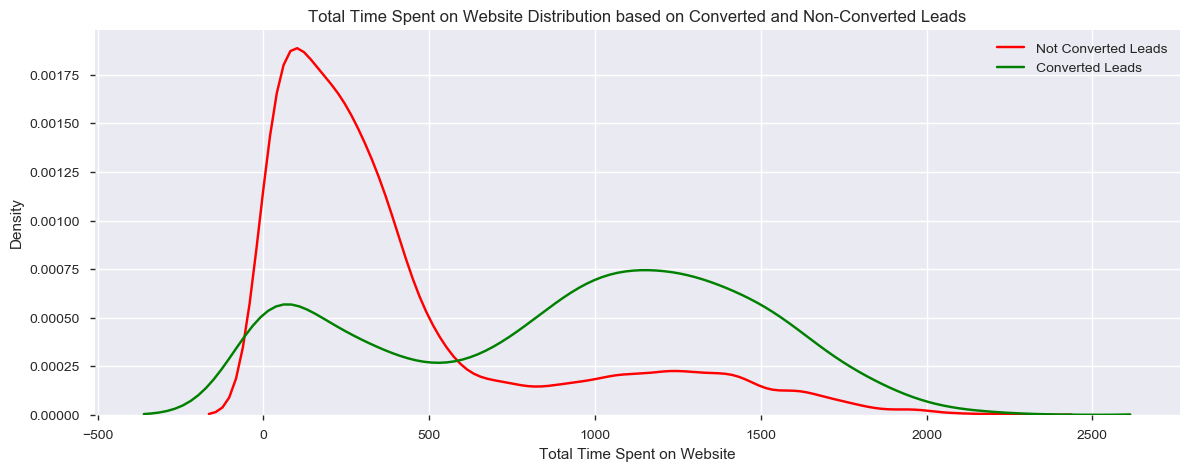

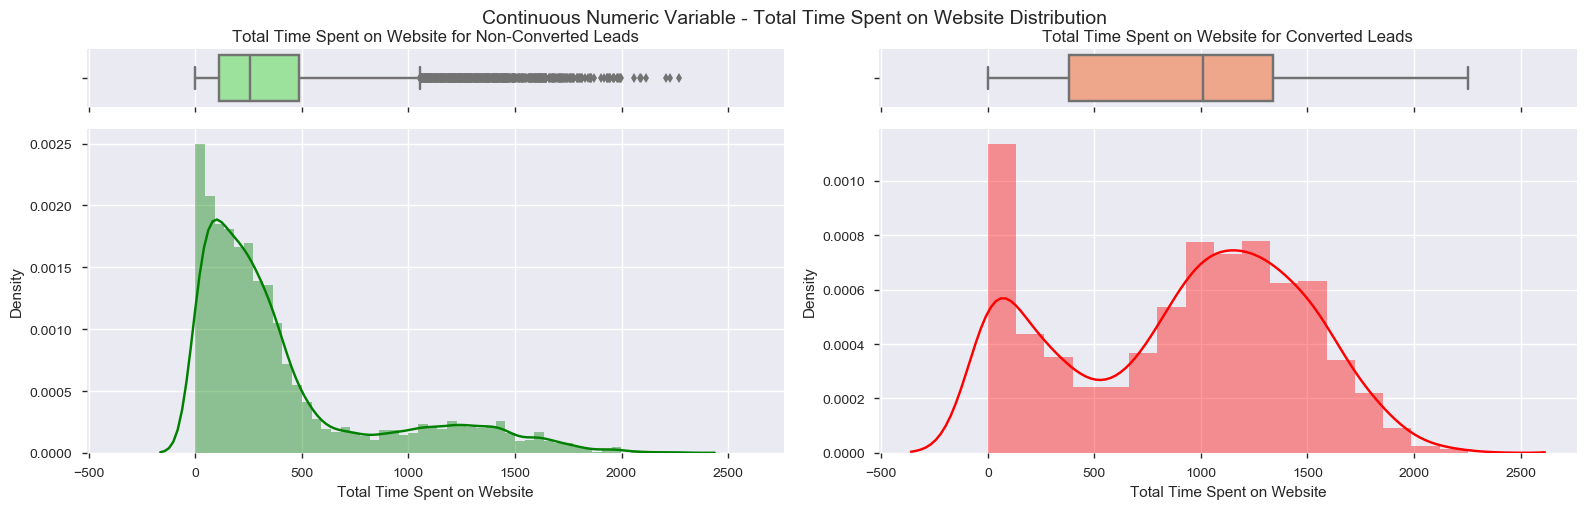

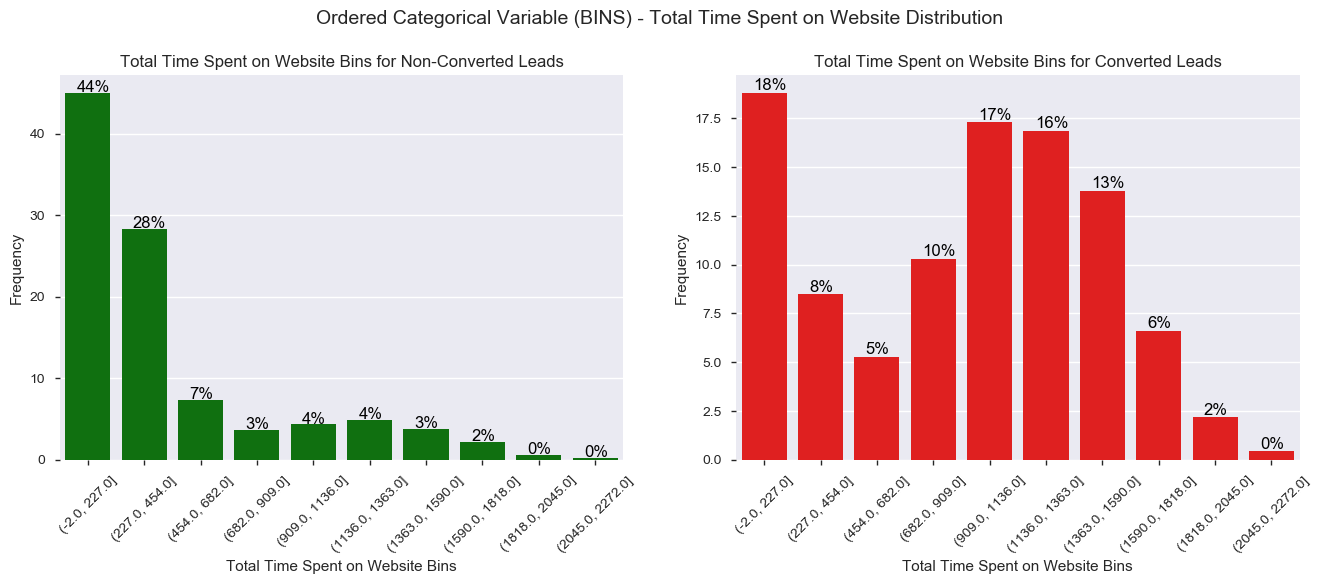

In [48]:
num_univariate_anaysis_kde("Total Time Spent on Website")
dist_continuous_numeric_univariate_analysis("Total Time Spent on Website")
plot_bins_univariate_analysis("Total Time Spent on Website")

<font color='blue'>Data Interpretation for Total Time Spent on Website Segmented Univariate Analysis  
- If the Total Time Spent on Website is high then the conversion is also higher.
- If the Total Time Spent on Website is low then the conversion is very low.
- Clear visualization of correlation with conversion (y dependent variable)

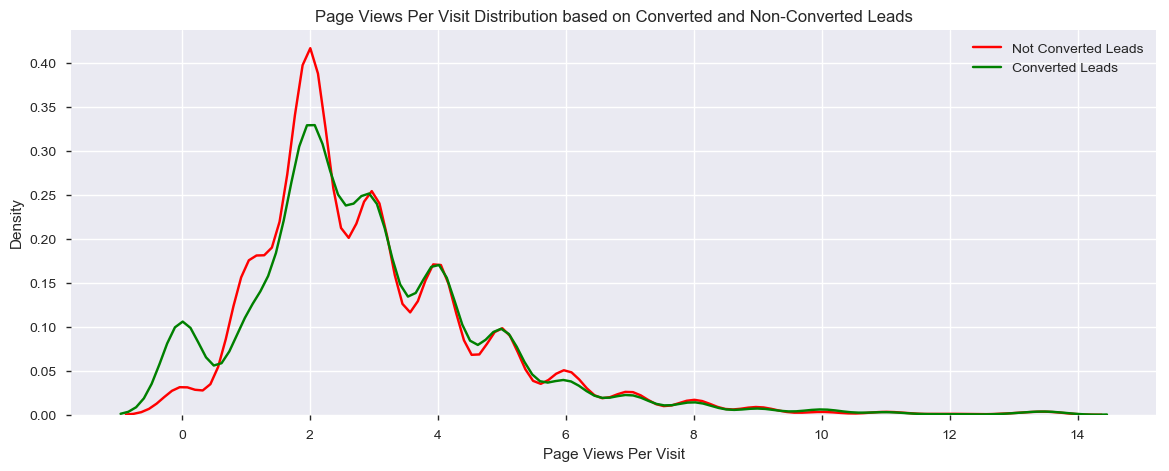

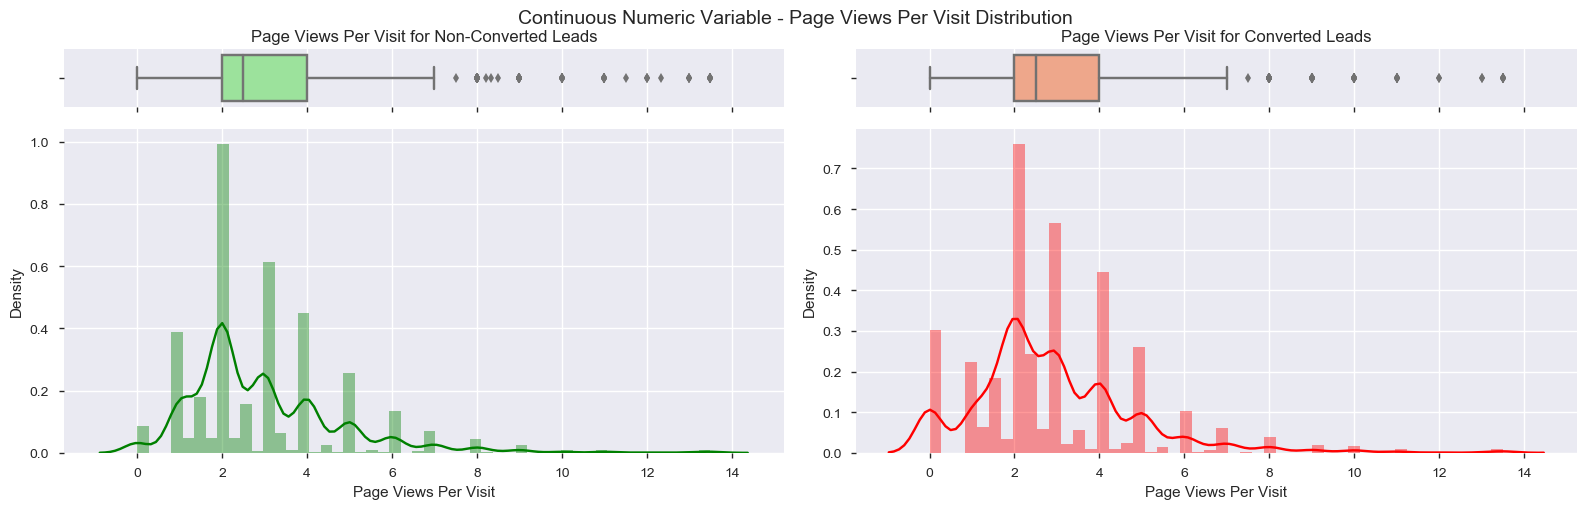

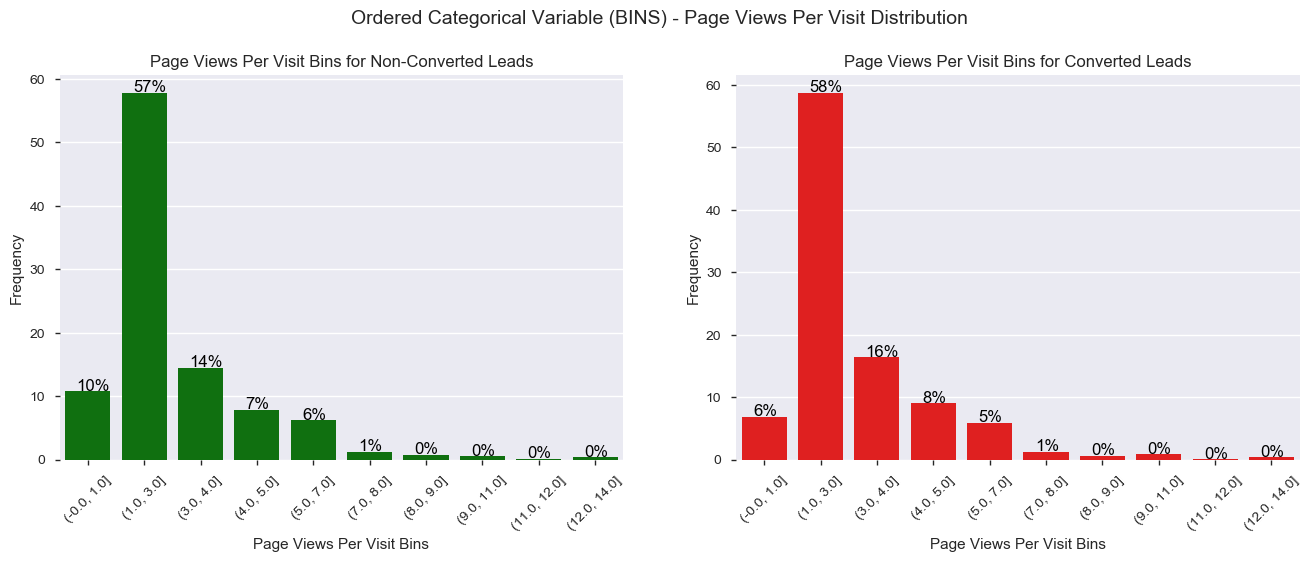

In [49]:
num_univariate_anaysis_kde("Page Views Per Visit")
dist_continuous_numeric_univariate_analysis("Page Views Per Visit")
plot_bins_univariate_analysis("Page Views Per Visit")

<font color='blue'>Data Interpretation for Page Views Segmented Univariate Analysis  
- The Page Views feature does not have much difference between the converted and not converted density distributions
- The values in the bins for both converted and not converted is similar

<a id="CFA"></a>
### 2.7 Categorical Feature Analysis

#### Converted Dependent Variable (y) Analysis

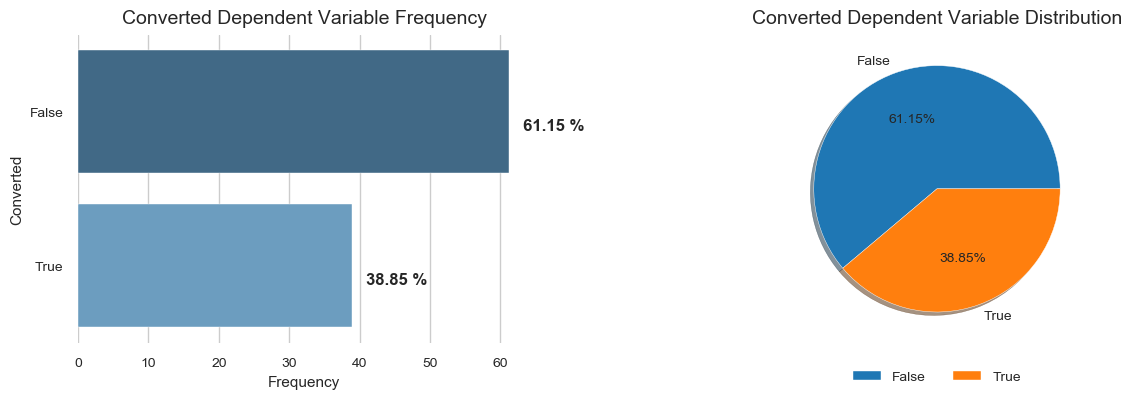

In [50]:
ser = np.round((df_leads["Converted"].value_counts()/len(df_leads["Converted"]))*100,2)

plt.figure(figsize=(14,4))
sns.set_style("whitegrid")
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.box(on=None)
ax1 = sns.barplot(x=ser.values, y=ser.index, orient="h", palette=("Blues_d"))
plt.title("Converted Dependent Variable Frequency", size=14, y=1.01)
plt.ylabel("Converted")
plt.xlabel("Frequency")
ax1.grid(True, axis="x")
for i in ax1.patches:
    ax1.text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
plt.subplot(grid[0, 1])
plt.pie(ser.values, labels=ser.index, autopct='%1.2f%%',shadow=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
ax = plt.title("Converted Dependent Variable Distribution", size=14, y=1.01)

<font color='blue'>Data Interpretation for the Dependent Variable (y)  
- 61.15% converted and 38.85% not converted post data clean up

<a id="CFUA"></a>
#### 2.7.1 Categorical Features - Univariate Analysis

In [51]:
# Generic Function to plot box plots for Converted and Not Converted. Used for unordered categorical variables.
def plot_box(col):
    f,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    f.suptitle("Ordered Categorical Variable - " + col + " Distribution", size=14, y=1.01)
    sns.boxplot(x=df_leads.query('Converted == 0')[col], y=df_leads.query('Converted == 0').index, color="lightsalmon", ax=ax[0])
    ax[0].title.set_text(col + " Distribution for Not Converted Leads")
    ax[0].set(xlabel=col)
    ax[0].tick_params(axis='x', labelrotation=80)
    ax[0].set(ylabel='Density')

    sns.boxplot(x=df_leads.query('Converted == 1')[col], y=df_leads.query('Converted == 1').index, color="lightgreen", ax=ax[1])
    ax[1].title.set_text(col + " Bins for Converted Leads")
    ax[1].set(xlabel=col)
    ax[1].tick_params(axis='x', labelrotation=80)
    ax[1].set(ylabel='Density')
    
    plt.show()
    
# Generic Function to plot hbar plots for Converted and Not Converted. Used for unordered categorical variables.
def plot_hbar(col):
    ser_T0 = np.round((df_leads.query('Converted == 0')[col].value_counts()/len(df_leads.query('Converted == 0')[col]))*100,2)
    ser_T1 = np.round((df_leads.query('Converted == 1')[col].value_counts()/len(df_leads.query('Converted == 1')[col]))*100,2)

    f,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    f.suptitle("Ordered Categorical Variable - " + col + " Distribution", size=14, y=1.01)
               
    plt.box(on=None)
    sns.barplot(x=ser_T0.values, y=ser_T0.index, orient="h", palette=("Blues_d"), ax=ax[0])
    ax[0].title.set_text(col + " Variable Frequency for Not Converted Leads")
    ax[0].set(ylabel=col)
    ax[0].set(xlabel='Frequency')
    ax[0].grid(True, axis="x")
    for i in ax[0].patches:
        ax[0].text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
    plt.box(on=None)
    sns.barplot(x=ser_T1.values, y=ser_T1.index, orient="h", palette=("Blues_d"), ax=ax[1])
    ax[1].title.set_text(col + " Variable Frequency for Converted Lead")
    ax[1].set(ylabel=col)
    ax[1].set(xlabel='Frequency')
    ax[1].grid(True, axis="x")
    for i in ax[1].patches:
        ax[1].text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Procedure to deduce the frequency of a column in dataframe and to plot percentage and frequency distribution
# col - name of column on which analysis is to be performed
def unordered_categorical_univariate_analysis(col):
    plot_hbar(col)
    plot_box(col)


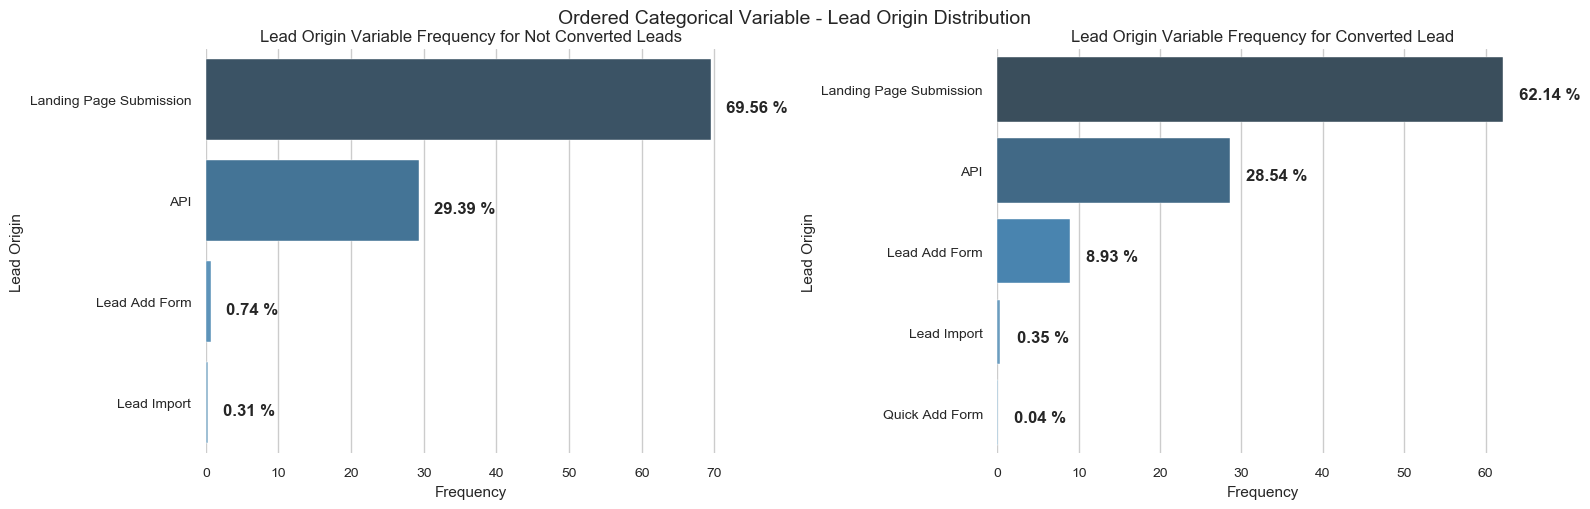

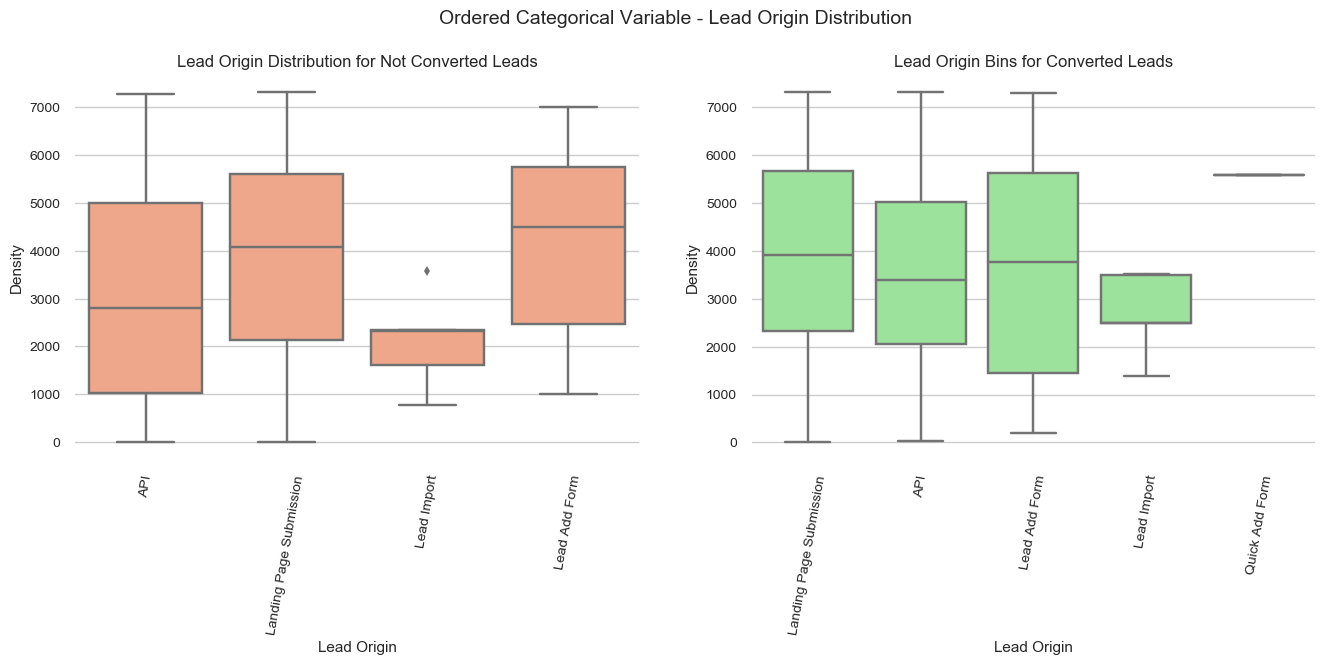

In [52]:
unordered_categorical_univariate_analysis('Lead Origin')

<font color='blue'>Data Interpretation for Lead Origin  
- The density for both Converted and Not Converted for Lead Origin is almost the same. Visually there is no differentiation.

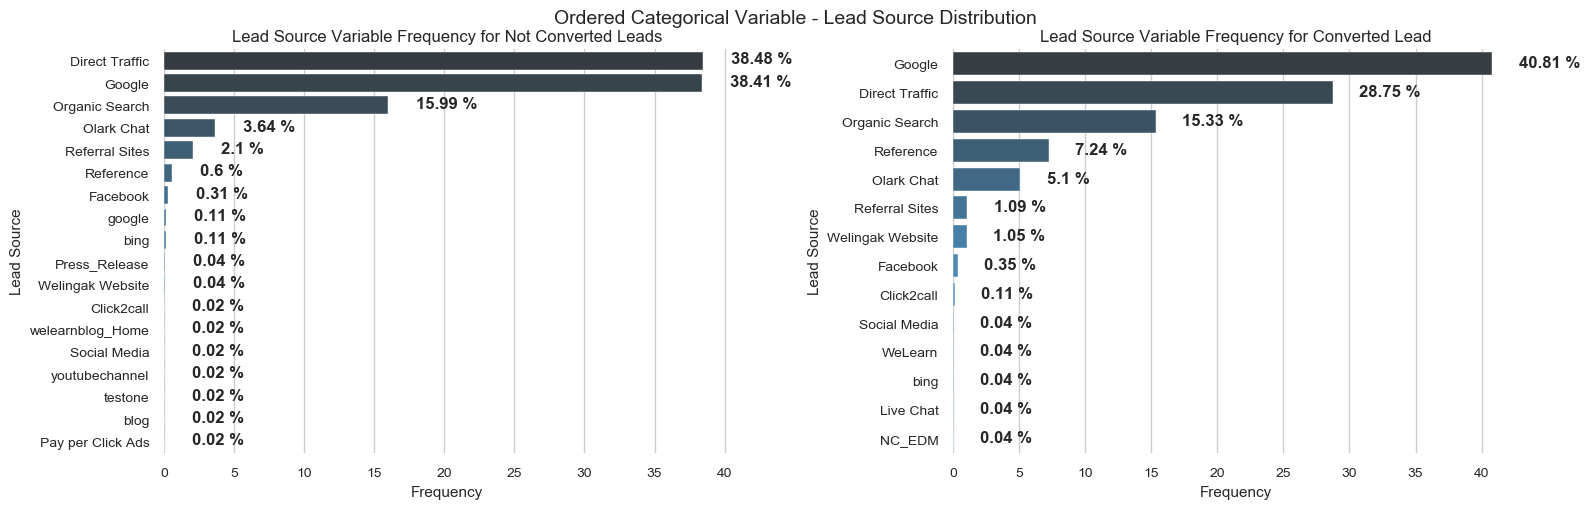

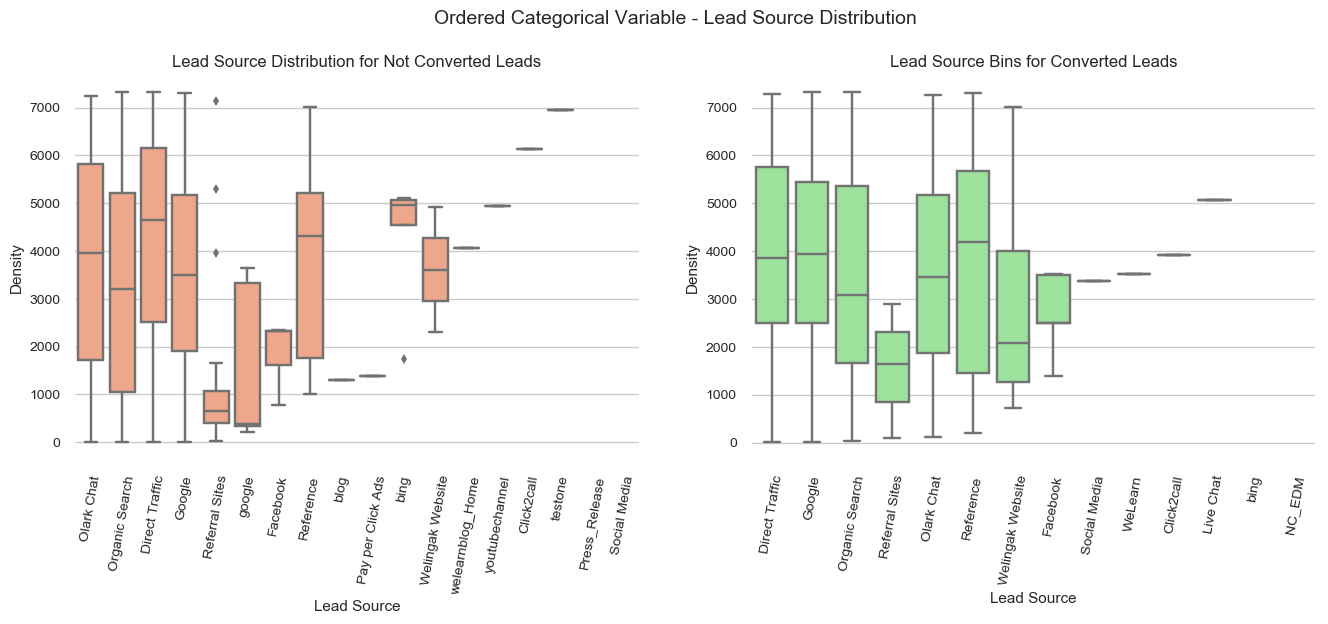

In [53]:
unordered_categorical_univariate_analysis('Lead Source')

<font color='blue'>Data Interpretation for Lead Source  
- The density for both Converted and Not Converted for Lead Source is almost the same. Visually there is no differentiation.
- The value of "Reference" seems to have a higher conversion

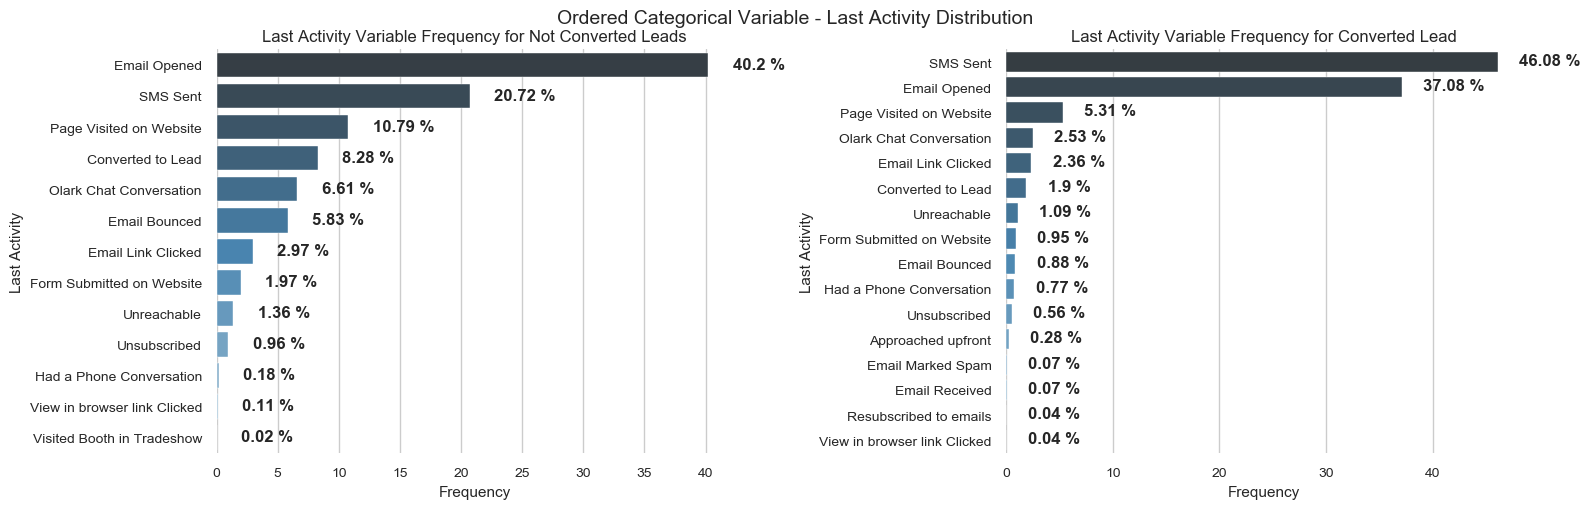

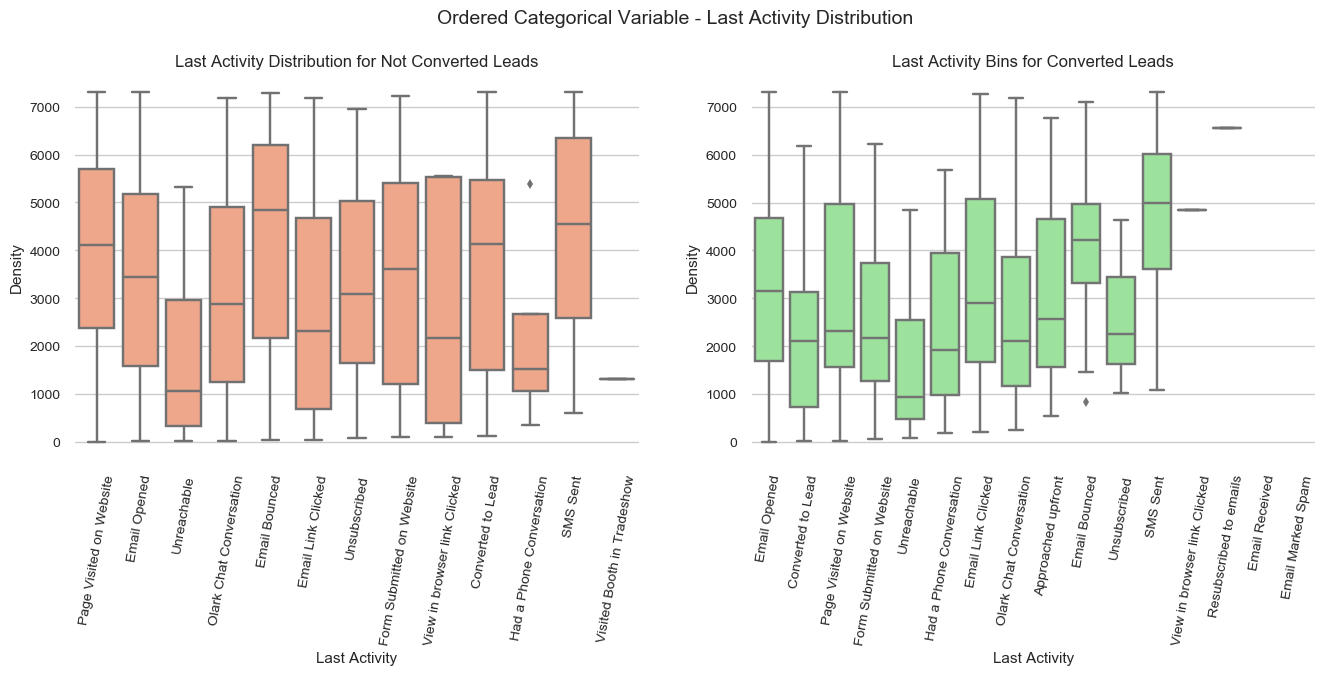

In [54]:
unordered_categorical_univariate_analysis('Last Activity')

<font color='blue'>Data Interpretation for Last Activity  
- The SMS Sent seems has a higher conversion success

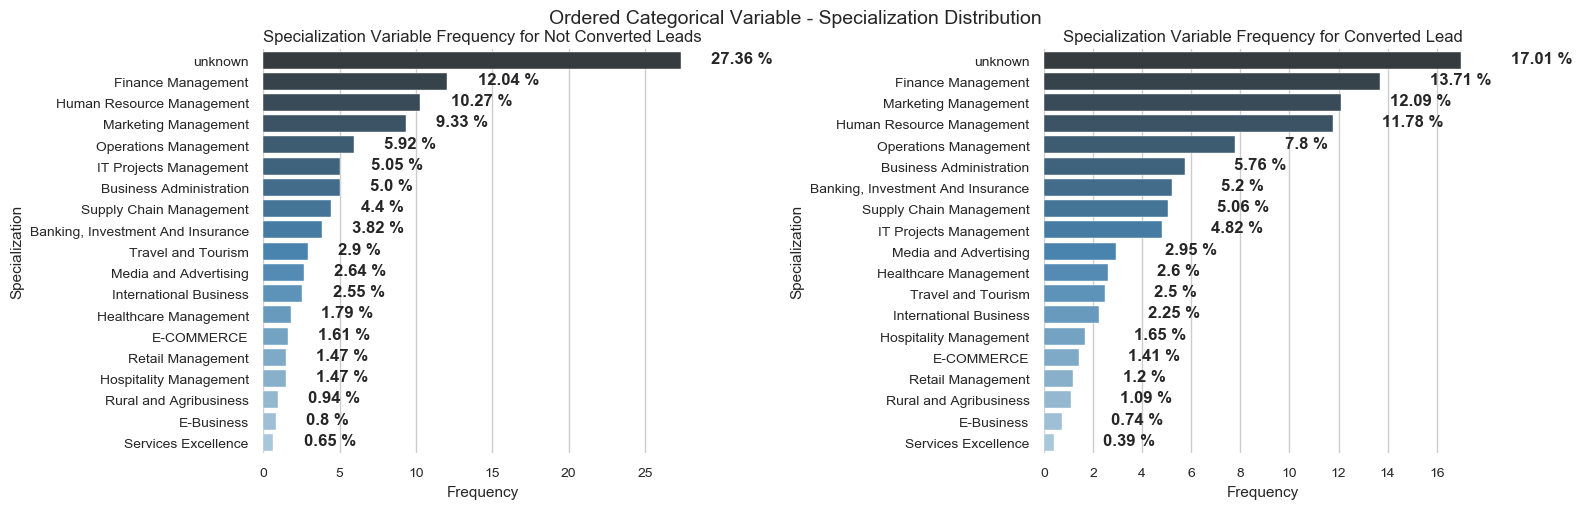

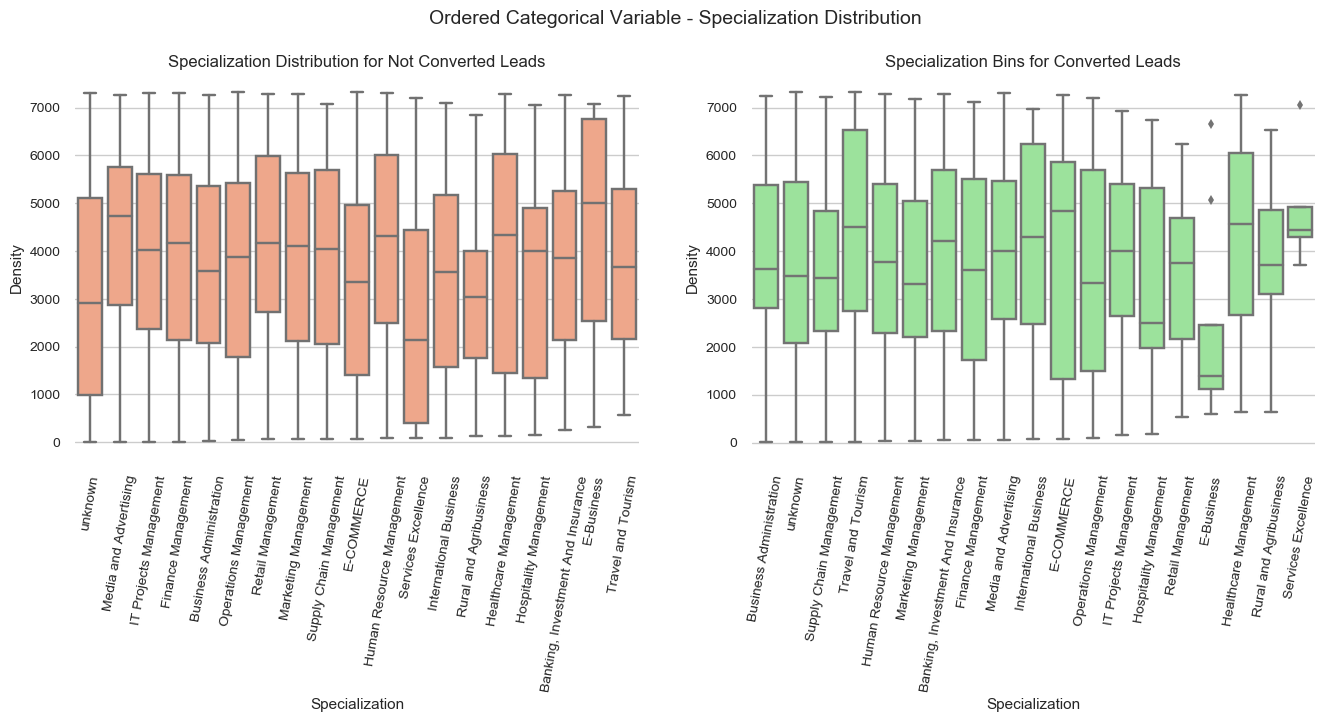

In [55]:
unordered_categorical_univariate_analysis('Specialization')

<font color='blue'>Data Interpretation for Specialization  
- "unknown" value is due to the missing value treatment. This value will be removed once dummy variables are created.
- E-Business Specialization seems to have higher density in conversion bracket.
- Services Excellence seems to have high conversion

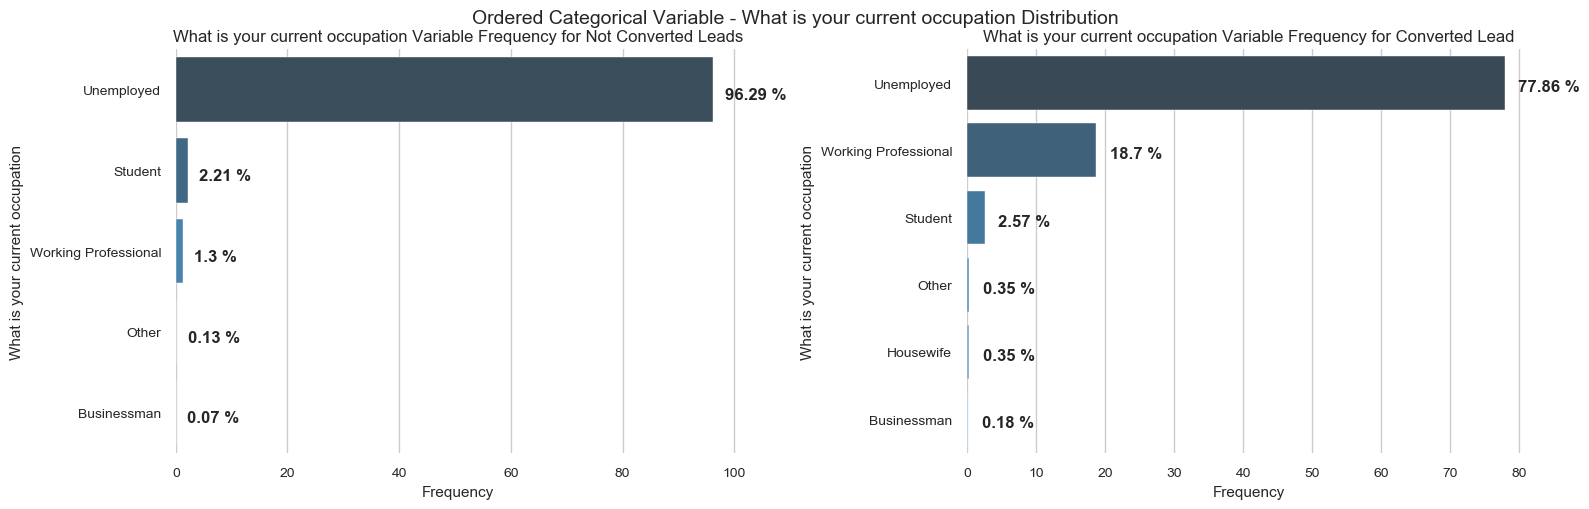

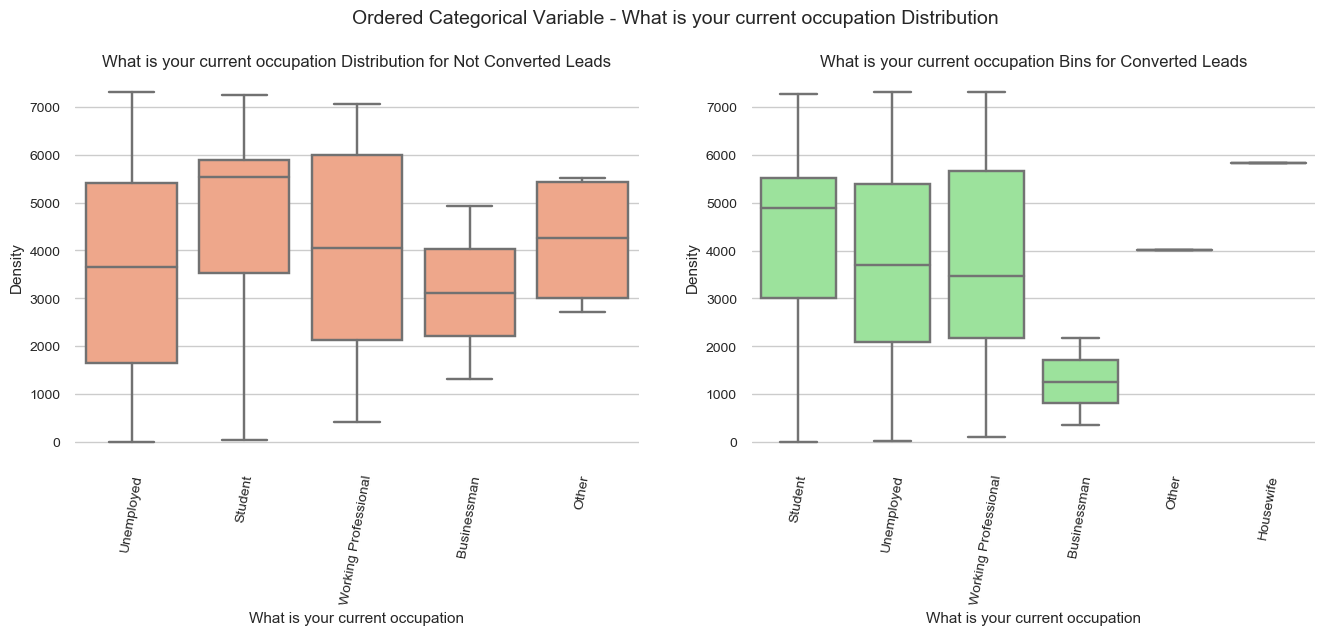

In [56]:
unordered_categorical_univariate_analysis('What is your current occupation')

<font color='blue'>Data Interpretation for Current Occupation  
- Working Professional Occupation has a very high conversion. This value seems to have the highest positive correlation. This is followed by Unemployed.
- Businessman occupation has very low conversion.

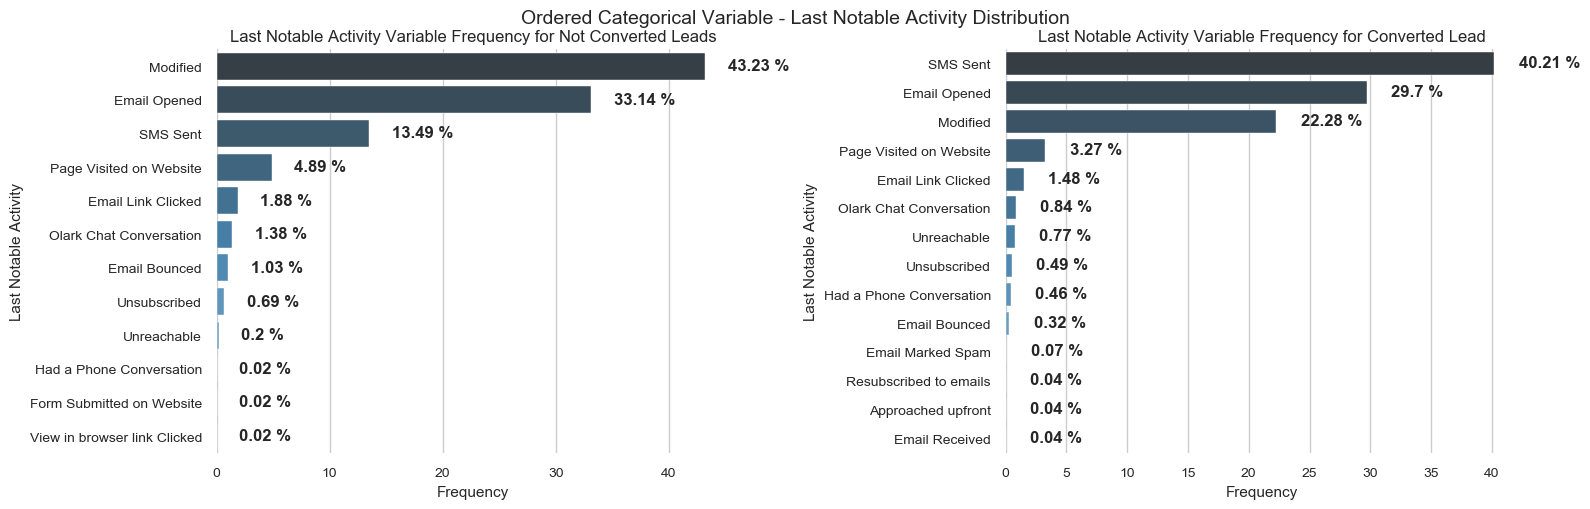

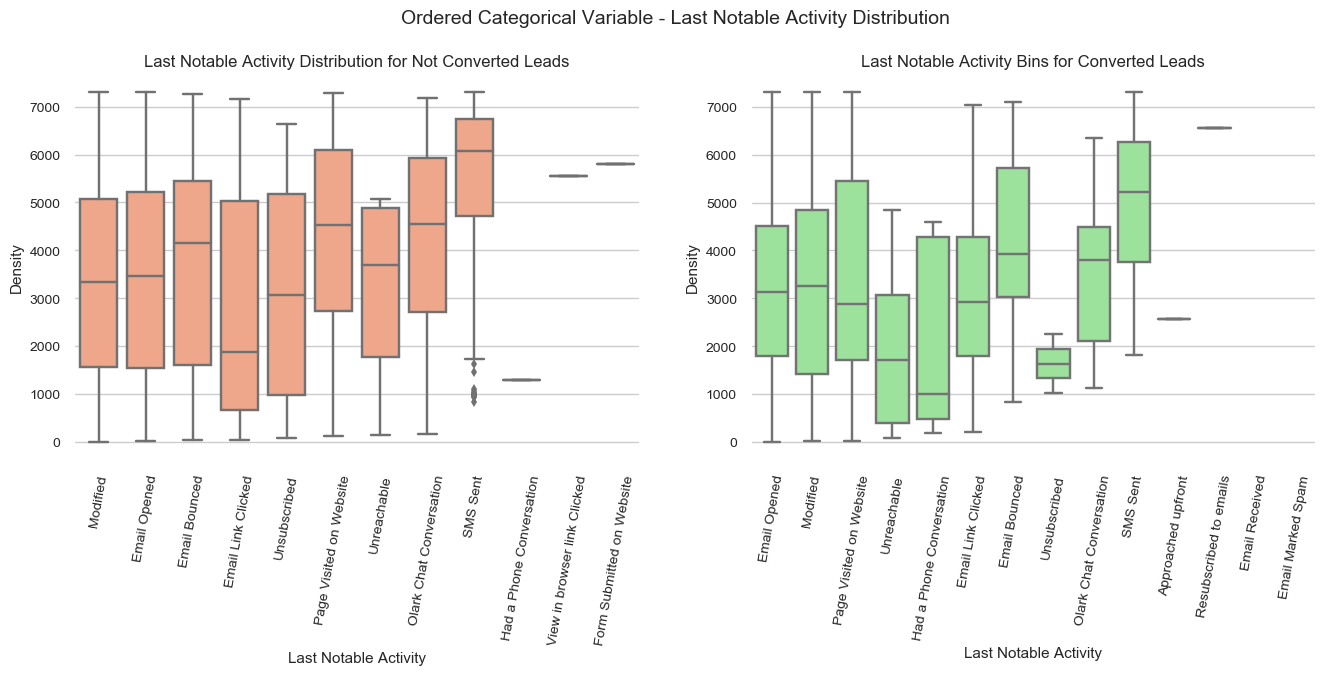

In [57]:
unordered_categorical_univariate_analysis('Last Notable Activity')

<font color='blue'>Data Interpretation for Last Notable Activity  
- The Modified value has higher conversion
- The Unsubscribed value has seen low conversion density

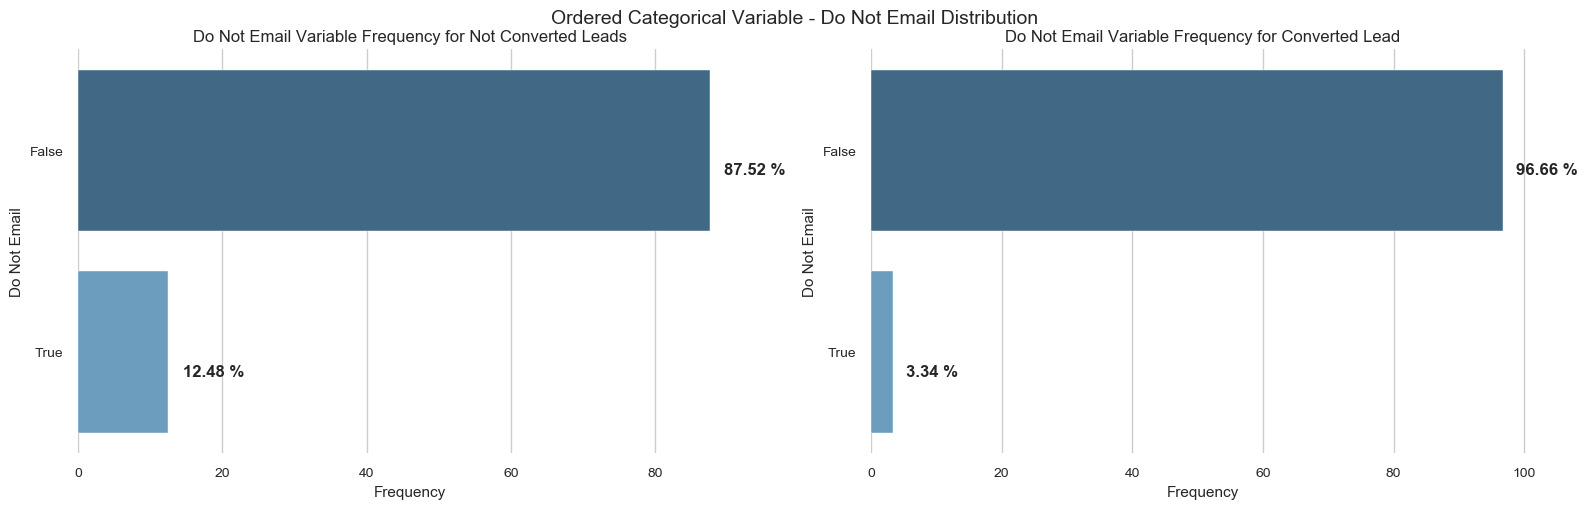

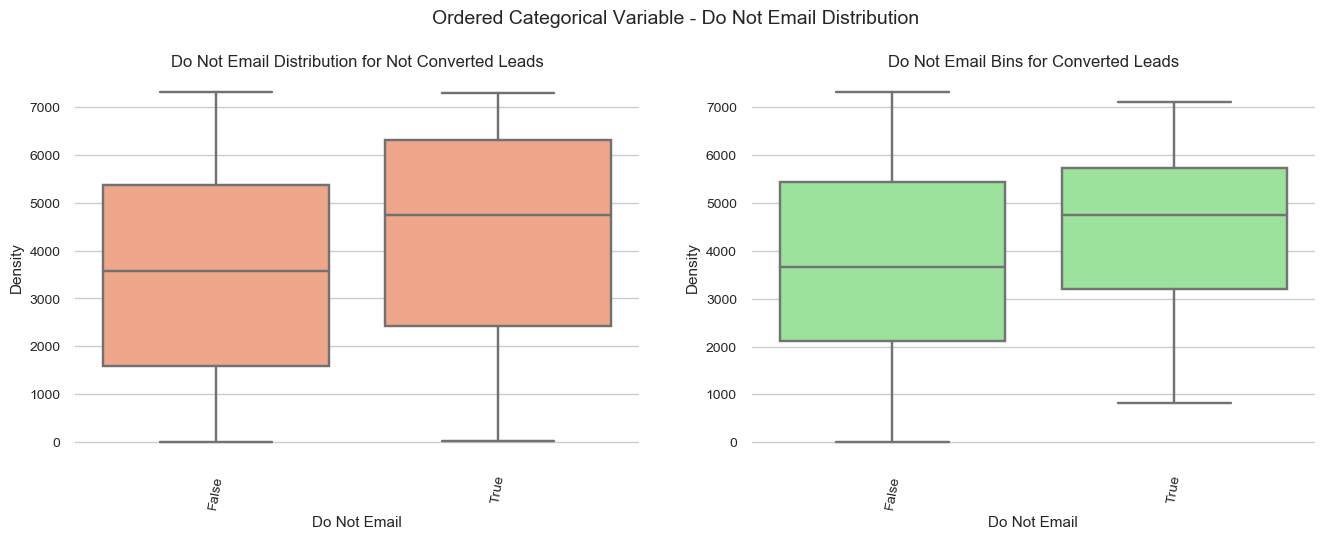

In [58]:
unordered_categorical_univariate_analysis('Do Not Email')

<font color='blue'>Data Interpretation for Do Not Email  
- Do Not Email False leads to more conversion. And True leads to more non-conversions

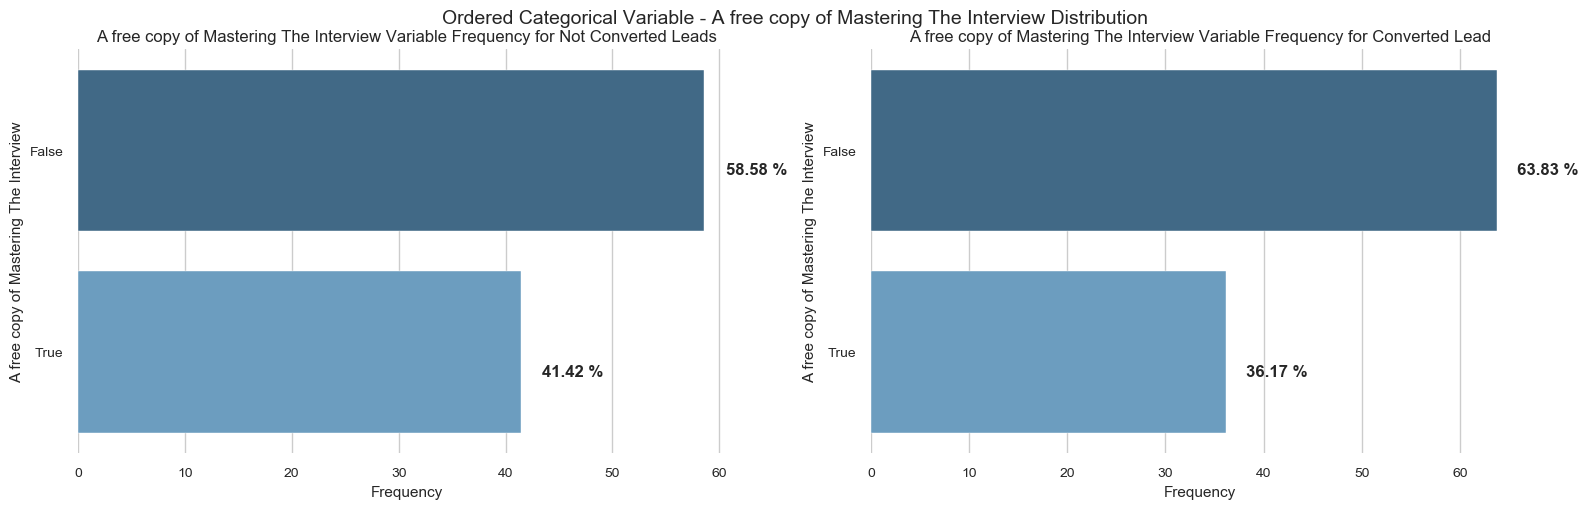

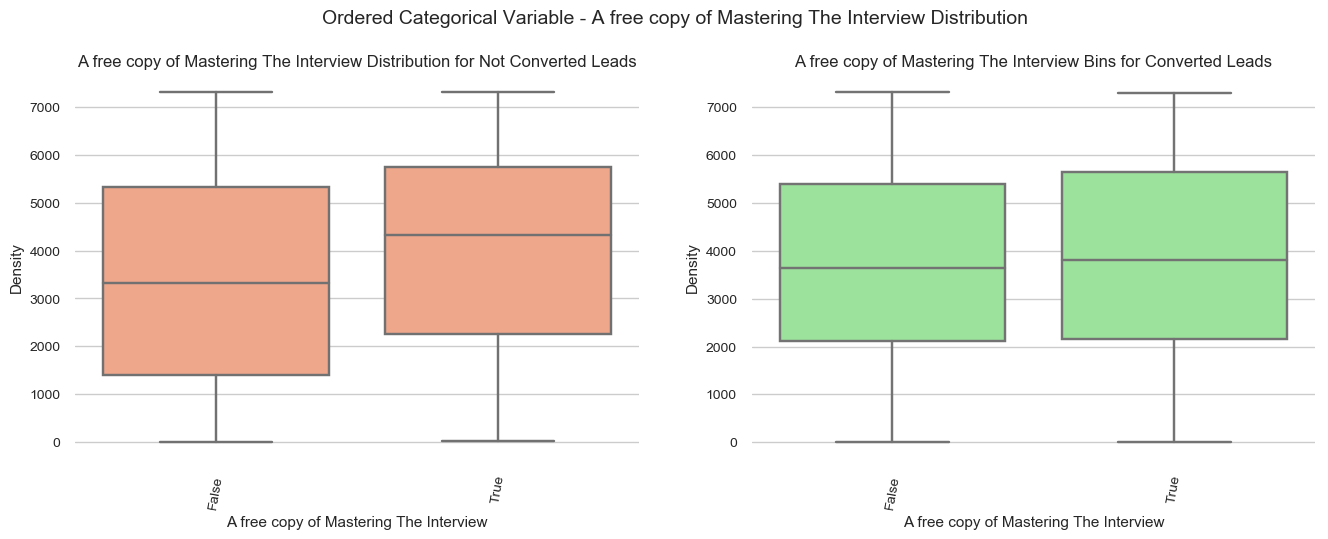

In [59]:
unordered_categorical_univariate_analysis('A free copy of Mastering The Interview')

<font color='blue'>Data Interpretation for Do Not Email  
- Similar visualizations, no significant value for conversion

<a id="CFBA"></a>
#### 2.7.2 Categorical Features - Bivariate Analysis

Custom TOOL for Analysis For Application Data
Tool for analysis of categorical variables for quick exploration
    -  Univariate
    -  Categorical Bivariate Analysis
The analysis and data interpretation is done mentioned in the subsequent sections.

In [60]:
def generic_bivariate_analysis(col1, col2, Impact, Across):
    func = lambda x: np.round(x.count()/df_leads.query('Converted == 0').shape[0],4)
    df = df_leads.query('Converted == 0').pivot_table(index=col1, columns=col2, values='Lead Number', aggfunc=func)
    plt.figure(figsize=[df.shape[1]*1.5,df.shape[0]*0.8])
    plt.title(Across + " Distribution for Not Converted over " + Impact,fontsize=14, y=1.05)
    ax = sns.heatmap(df, annot=True,linewidths=.5, fmt='.1%', cmap="YlGnBu", annot_kws={"size": 12})
    plt.ylabel(Impact)
    plt.xlabel(Across)
    ax.xaxis.set_label_position("top")
    ax.xaxis.tick_bottom()
    plt.show()
    
    func = lambda x: np.round(x.count()/df_leads.query('Converted == 1').shape[0],4)
    df = df_leads.query('Converted == 1').pivot_table(index=col1, columns=col2, values='Lead Number', aggfunc=func)
    plt.figure(figsize=[df.shape[1]*1.5,df.shape[0]*0.8])
    plt.title(Across + " Distribution for Converted over " + Impact,fontsize=14, y=1.05)
    ax = sns.heatmap(df, annot=True,linewidths=.5, fmt='.1%', cmap="YlGnBu", annot_kws={"size": 12})
    plt.ylabel(Impact)
    plt.xlabel(Across)
    ax.xaxis.set_label_position("top")
    ax.xaxis.tick_bottom()

In [61]:
# Running Tool
from ipywidgets import interact

col_dict = {'-- select --':'0','Lead Origin':'Lead Origin',
            'Lead Source':'Lead Source',
            'Last Activity':'Last Activity',
            'Specialization':'Specialization',
            'What is your current occupation':'What is your current occupation',
            'Last Notable Activity':'Last Notable Activity',
            'Do Not Email':'Do Not Email', 
            'A free copy of Mastering The Interview':'A free copy of Mastering The Interview'}
lst_Col_Key = list(col_dict.keys())

def cmb_change(Impact, Across):
    col1 = col_dict.get(Impact)
    col2 = col_dict.get(Across)
    if (col1 != col2 and col1 != '0' and col2 != '0'):
        generic_bivariate_analysis(col1, col2, Impact, Across)
    elif (col1 !='0'):
        unordered_categorical_univariate_analysis(col1)
print("Select only Impact Variable for Univariate Analysis")
print("Select both Impact and Across Variables for Categorical Bivariate Analysis")
interact(cmb_change, Impact= lst_Col_Key, Across=lst_Col_Key)

Select only Impact Variable for Univariate Analysis
Select both Impact and Across Variables for Categorical Bivariate Analysis


interactive(children=(Dropdown(description='Impact', options=('-- select --', 'Lead Origin', 'Lead Source', 'L…

<function __main__.cmb_change(Impact, Across)>

<a id="FEDP"></a>
# 3. Feature Engineering - Data Preparation

In [62]:
# Renaming dataframe for better organization
df_prep_leads = df_leads.copy()

# Renaming Columns to shorten their name
df_prep_leads.rename(columns = {'What is your current occupation':'Current Occupation',
               'A free copy of Mastering The Interview':'Free Copy'}, inplace=True)

There are no Ordered Categorical Variables for conversion

In [63]:
#selecting numerical variables
numerical_features = list(df_prep_leads.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['Lead Number']))
print("Numerical Columns: ", numerical_features)

#selecting categorical vairables
categorical_features = list(df_prep_leads.select_dtypes(include='object').columns)
print("\nCategorical Columns: ", categorical_features)

#selecting binary vairables
binary_features = list(df_prep_leads.select_dtypes(include='bool').columns)
print("\nBinary Columns: ", binary_features)

Numerical Columns:  ['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']

Categorical Columns:  ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current Occupation', 'Last Notable Activity']

Binary Columns:  ['Do Not Email', 'Converted', 'Free Copy']


<a id="DM"></a>
### 3.1 Derived Metrics
- Possibilities of Derived Metrics are as follows:
    - Combine the three numerical variables by multiplying them into a single derived column. This will yield the overall time spent online in one feature
    - The numerical features could even be binned into 

Not creating any derived metrics as the above 2 points are not compelling enough and don't seem to add a lot of value.

<a id="DC"></a>
### 3.2 Dummy Encoding - Creating dummy variables for the Categorical Columns

In [64]:
lst = list(set(categorical_features + binary_features) - set(['Converted']))
lst

['Lead Source',
 'Lead Origin',
 'Current Occupation',
 'Last Activity',
 'Specialization',
 'Last Notable Activity',
 'Do Not Email',
 'Free Copy']

In [65]:
# Create dummy columns for categorical variables. Create dummy dataframe, remove 1st column and concat with original df
for i in (lst):
    dummy_df = pd.get_dummies(df_prep_leads[i], prefix=i, drop_first=True)
    df_prep_leads = pd.concat([df_prep_leads, dummy_df], axis=1)
    df_prep_leads.drop(i,axis=1,inplace=True)
    
df_prep_leads.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737      False          0.0                            0   
1       660728      False          5.0                          674   
2       660727       True          2.0                         1532   
3       660719      False          1.0                          305   
4       660681       True          2.0                         1428   

   Page Views Per Visit  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                   0.0                           0                     0   
1                   2.5                           0                     0   
2                   2.0                           1                     0   
3                   1.0                           1                     0   
4                   1.0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                             0   
1                   0                    0                             0   
2                   0                    0                             0   
3                   0                    0                             0   
4                   0                    0                             0   

   Lead Source_youtubechannel  Lead Origin_Landing Page Submission  \
0                           0                                    0   
1                           0                                    0   
2                           0                                    1   
3                           0                                    1   
4                           0                                    1   

   Lead Origin_Lead Add For

In [66]:
df_prep_leads.shape

(7323, 85)

Dropping Specialization_unknown column which was created for missing values.

In [67]:
df_prep_leads.drop('Specialization_unknown',axis=1,inplace=True)

In [68]:
def topcorr(df,cols):
    df_corr = pd.DataFrame(round(df[cols].corr()*100).unstack().reset_index())
    df_corr.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'}, inplace=True)
    df_corr = df_corr[df_corr['Feature_1'] != df_corr['Feature_2']]
    df_corr = df_corr[df_corr['Feature_1'] != 'price']
    df_corr = df_corr[df_corr['Feature_2'] != 'price']
    df_corr.drop_duplicates(subset='Correlation', inplace=True)
    print("TOP 10 HIGH POSITIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=False).head(10))
    print("\nTOP 10 HIGH NEGATIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=True).head(10))

topcorr(df_prep_leads,list(df_prep_leads.columns))

TOP 10 HIGH POSITIVE CORRELATION % 

                                   Feature_1  \
3177         Last Activity_Email Marked Spam   
531                     Lead Source_Facebook   
1202                   Lead Source_Reference   
4028              Last Activity_Unsubscribed   
3262              Last Activity_Email Opened   
3858                  Last Activity_SMS Sent   
3092        Last Activity_Email Link Clicked   
3347            Last Activity_Email Received   
3688   Last Activity_Page Visited on Website   
3517  Last Activity_Had a Phone Conversation   

                                           Feature_2  Correlation  
3177         Last Notable Activity_Email Marked Spam        100.0  
531                          Lead Origin_Lead Import         96.0  
1202                       Lead Origin_Lead Add Form         90.0  
4028              Last Notable Activity_Unsubscribed         87.0  
3262              Last Notable Activity_Email Opened         85.0  
3858                  Last

<a id="split"></a>
# 4. Split Data into Training and Test Sets  

In [69]:
np.random.seed(0)
df_train, df_test = train_test_split(df_prep_leads, train_size = 0.7, random_state = 100)
print("Train Shape:", df_train.shape, "Test Shape:", df_test.shape)

Train Shape: (5126, 84) Test Shape: (2197, 84)


In [70]:
# Putting feature variable to X
X = df_prep_leads.drop(['Converted'], axis=1)
X.set_index('Lead Number', inplace=True)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
660737               0.0                            0                   0.0   
660728               5.0                          674                   2.5   
660727               2.0                         1532                   2.0   
660719               1.0                          305                   1.0   
660681               2.0                         1428                   1.0   

             Lead Source_Direct Traffic  Lead Source_Facebook  \
Lead Number                                                     
660737                                0                     0   
660728                                0                     0   
660727                                1                     0   
660719                                1                     0   
660681                                0                     0   

             Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
Lead Number                                                                  
660737                        0                      0                   0   
660728                        0                      0                   0   
660727                        0                      0                   0   
660719                        0                      0                   0   
660681                        1                      0                   0   

             Lead Source_Olark Chat  Lead Source_Organic Search  \
Lead Number                                                       
660737                            1                           0   
660728                            0                           1   
660727                            0                           0   
660719                            0                           0   
660681                            0                           0   

             Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
Lead Number                                                             
660737                                   0                          0   
660728                                   0                          0   
660727                                   0                          0   
660719                                   0                          0   
660681                                   0                          0   

             Lead Source_Reference  Lead Source_Referral Sites  \
Lead Number                                                      
660737                           0                           0   
660728                           0                           0   
660727                           0                           0   
660719                           0                           0   
660681                           0                           0   

             Lead Source_Social Media  Lead Source_WeLearn  \
Lead Number                                                  
660737                              0                    0   
660728                              0                    0   
660727                              0                    0   
660719                              0                    0   
660681                              0                    0   

             Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
Lead Number                                                                     
660737                                  0                 0                 0   
660728                                  0                 0                 0   
660727                                  0                 0                 0   
660719                                  0                 0                 0   
660681                                  0                 0                 0   

        

In [71]:
# Putting response variable to y
y = df_prep_leads[['Converted','Lead Number']]
y.set_index('Lead Number', inplace=True)
y = y['Converted']
y.head()

Lead Number
660737    False
660728    False
660727     True
660719    False
660681     True
Name: Converted, dtype: bool

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

<a id="train"></a>
# 5. Training the Model  

<a id="MMS"></a>
### 5.1 MinMax Scaling

Applying Scaler only numerical features.

In [73]:
scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train.describe([0.25,0.50,0.75,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  5126.000000                  5126.000000           5126.000000   
mean      0.180187                     0.269251              0.219752   
std       0.143389                     0.242252              0.140306   
min       0.000000                     0.000000              0.000000   
25%       0.085106                     0.063027              0.148148   
50%       0.127660                     0.165557              0.185185   
75%       0.212766                     0.479805              0.296296   
95%       0.468085                     0.708278              0.481481   
99%       0.765957                     0.821460              0.722222   
max       1.000000                     1.000000              1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 5126.000000           5126.000000         5126.000000   
mean                     0.351151              0.003316            0.389583   
std                      0.477377              0.057498            0.487703   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
95%                      1.000000              0.000000            1.000000   
99%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
count            5126.000000         5126.000000             5126.000000   
mean                0.000195            0.000195                0.043309   
std                 0.013967            0.013967                0.203571   
min                 0.000000            0.000000                0.000000   
25%                 0.000000            0.000000                0.000000   
50%                 0.000000            0.000000                0.000000   
75%                 0.000000            0.000000                0.000000   
95%                 0.000000            0.000000                0.000000   
99%                 0.000000            0.000000                1.000000   
max                 1.000000            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
count                 5126.000000                    5126.000000   
mean                     0.155872                       0.000195   
std                      0.362769                       0.013967   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
95%                      1.000000                       0.000000   
99%                      1.000000                       0.000000   
max                      1.000000                       1.000000   

       Lead Source_Press_Release  Lead Source_Reference  \
count                5126.000000            5126.000000   
mean                    0.000390               0.031799   
std                     0.019751               0.175481   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     0.000000               0.000000   
95%                     0.000000               0.000000   
99%                     0.000000               1.000000   
max                     1.000000               1.000000   

       Lead Source_Referral Sites  Lead Source_Social Media  \
count                 5126.000000 

<a id="RFE"></a>
### 5.2 RFE (Recursive Feature Elimination)

In [74]:
log = LogisticRegression()
log.fit(X_train, y_train)
rfe = RFE(log, 10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Direct Traffic', False, 44),
 ('Lead Source_Facebook', False, 70),
 ('Lead Source_Google', False, 56),
 ('Lead Source_Live Chat', False, 61),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Pay per Click Ads', False, 59),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_WeLearn', False, 37),
 ('Lead Source_Welingak Website', False, 5),
 ('Lead Source_bing', False, 39),
 ('Lead Source_blog', False, 73),
 ('Lead Source_google', False, 47),
 ('Lead Source_testone', False, 60),
 ('Lead Source_welearnblog_Home', False, 53),
 ('Lead Source_youtubechannel', False, 55),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 

In [75]:
feature_cols = list(X_train.columns[rfe.support_])
feature_cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Lead Add Form',
 'Current Occupation_Housewife',
 'Current Occupation_Working Professional',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website',
 'Do Not Email_True']

<a id="STATS"></a>
### 5.3 Building model using statsmodel, for the detailed statistics

In [76]:
# function for listing vif
def vif_list(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

# function for listing model
def model(features):
    X_train_rfe = X_train[features]
    X_train_rfe = sm.add_constant(X_train_rfe)
    log = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()
    print(log.summary())
    vif_list(X_train[features])
    return log

**Model #1**

In [77]:
log_1 = model(feature_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5126
Model:                            GLM   Df Residuals:                     5115
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2404.9
Date:                Mon, 26 Aug 2019   Deviance:                       4809.9
Time:                        22:20:10   Pearson chi2:                 5.16e+03
No. Iterations:                    21   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4615     

Checking Three conditions

    High p-value, high VIF
    High-low:
        High p, low VIF ==> Remove these first
        Low p, high VIF ==> Remove these after
    Low p, Low VIF

First remove high p-value cols and recompute VIF. As it is possible VIF decreases with this variable being removed.

**Model #2**<br/>
Current Occupation_Housewife has a high p-value. Removing it.

In [78]:
feature_cols.remove('Current Occupation_Housewife')
log_2 = model(feature_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5126
Model:                            GLM   Df Residuals:                     5116
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2409.7
Date:                Mon, 26 Aug 2019   Deviance:                       4819.5
Time:                        22:20:10   Pearson chi2:                 5.18e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4555     

**Model #3**<br/>
Page Views Per Visit has a high VIF value. Removing it.

In [79]:
feature_cols.remove('Page Views Per Visit')
log_3 = model(feature_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5126
Model:                            GLM   Df Residuals:                     5117
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2421.7
Date:                Mon, 26 Aug 2019   Deviance:                       4843.3
Time:                        22:20:11   Pearson chi2:                 5.23e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6628     

**Model #4**<br/>
- The feature TotalVisits from a business perspective had the same distribution for converted and not converted and infact the graph was overlapping.
- Don't think this feature will add much value. Removing the feature to train the model

In [80]:
feature_cols.remove('TotalVisits')
log_4 = model(feature_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5126
Model:                            GLM   Df Residuals:                     5118
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2423.4
Date:                Mon, 26 Aug 2019   Deviance:                       4846.7
Time:                        22:20:11   Pearson chi2:                 5.21e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5748     

**Model #5**<br/>
- In the Categorical Features Segmented Analysis it was seen that the Conversion for Lead Source_Reference was high. Adding that column to see if model performance improves.

In [81]:
feature_cols.append('Lead Source_Reference')
log_5 = model(feature_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5126
Model:                            GLM   Df Residuals:                     5117
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2422.1
Date:                Mon, 26 Aug 2019   Deviance:                       4844.2
Time:                        22:20:11   Pearson chi2:                 5.18e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5755     

Adding Lead Source_Reference feature increased p-value and also VIF. Hence removing it.

In [82]:
feature_cols.remove('Lead Source_Reference')

#### log_4 model looks good. Baselining it.

## 6. Model Evaluation

<a id="Predictions"></a>
### 6.1 Predictions

In [83]:
# Getting the predicted values on the train set
y_train_pred = log_4.predict(sm.add_constant(X_train[feature_cols]))
y_train_pred[:10]

Lead Number
582094    0.756406
652986    0.681539
580339    0.085018
603943    0.578501
656589    0.219110
616761    0.973318
640035    0.209656
590757    0.838434
616173    0.566656
630568    0.140769
dtype: float64

In [84]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.75640609, 0.68153925, 0.08501846, 0.57850063, 0.21911008,
       0.97331792, 0.2096556 , 0.83843384, 0.56665649, 0.14076903])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [85]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0       True        0.756406       582094
1       True        0.681539       652986
2      False        0.085018       580339
3       True        0.578501       603943
4      False        0.219110       656589

<a id="ROC"></a>
### 6.2 ROC Curve

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

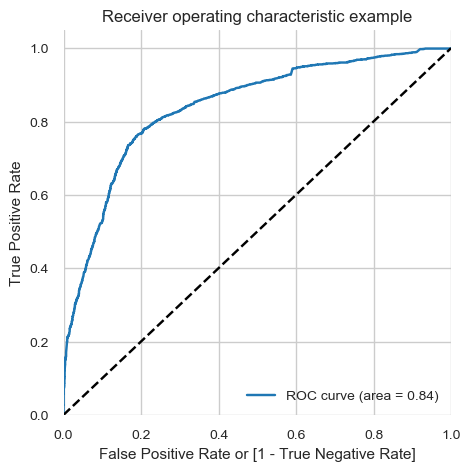

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<font color='blue'>Data Interpretation of ROC Curve  
 - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
 - The curve seems to be good for our model.

<a id="FOCP"></a>
### 6.3 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [89]:
# Columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       True        0.756406       582094    1    1    1    1    1    1    1   
1       True        0.681539       652986    1    1    1    1    1    1    1   
2      False        0.085018       580339    1    0    0    0    0    0    0   
3       True        0.578501       603943    1    1    1    1    1    1    0   
4      False        0.219110       656589    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    1    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [90]:
# Accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','TN','FP','FN','TP'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    TN = cm1[0,0]
    FP = cm1[0,1]
    FN = cm1[1,0]
    TP = cm1[1,1]
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,TN,FP,FN,TP]
print(cutoff_df)

     prob  accuracy     sensi     speci      TN      FP      FN      TP
0.0   0.0  0.384120  1.000000  0.000000     0.0  3157.0     0.0  1969.0
0.1   0.1  0.526726  0.964957  0.253405   800.0  2357.0    69.0  1900.0
0.2   0.2  0.669723  0.899441  0.526449  1662.0  1495.0   198.0  1771.0
0.3   0.3  0.770581  0.807517  0.747545  2360.0   797.0   379.0  1590.0
0.4   0.4  0.793601  0.739970  0.827051  2611.0   546.0   512.0  1457.0
0.5   0.5  0.786383  0.660741  0.864745  2730.0   427.0   668.0  1301.0
0.6   0.6  0.758876  0.536313  0.897688  2834.0   323.0   913.0  1056.0
0.7   0.7  0.738783  0.418994  0.938232  2962.0   195.0  1144.0   825.0
0.8   0.8  0.705228  0.272727  0.974976  3078.0    79.0  1432.0   537.0
0.9   0.9  0.672259  0.155409  0.994615  3140.0    17.0  1663.0   306.0


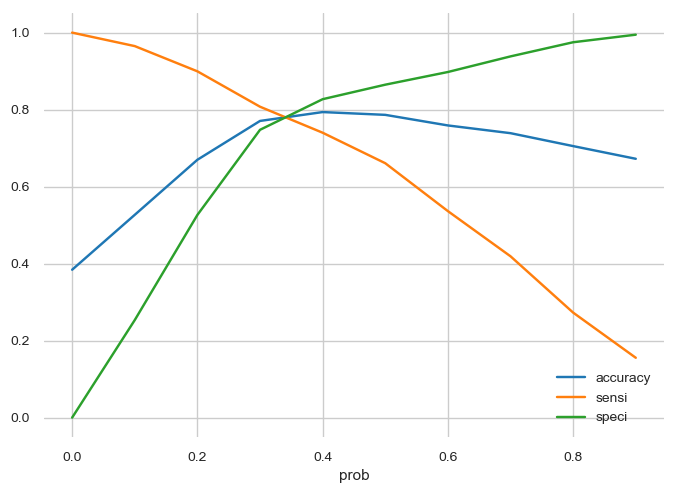

In [91]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 seems to be the optimum point to take it as a cutoff probability.

In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       True        0.756406       582094    1    1    1    1    1    1    1   
1       True        0.681539       652986    1    1    1    1    1    1    1   
2      False        0.085018       580339    1    0    0    0    0    0    0   
3       True        0.578501       603943    1    1    1    1    1    1    0   
4      False        0.219110       656589    1    1    1    0    0    0    0   

   0.7  0.8  0.9  predicted  
0    1    0    0          1  
1    0    0    0          1  
2    0    0    0          0  
3    0    0    0          1  
4    0    0    0          0

In [93]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7873585641825985

A score of 79% is a good score of accuracy

In [94]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2505,  652],
       [ 438, 1531]], dtype=int64)

In [95]:
# Actual/Predicted       not_converted  converted
        # not converted        2505        652
        # converted            438         1531  

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Sensitivity (or True Positive Rate (TPR)) of our logistic regression model
TP / float(TP+FN)

0.7775520568816658

Of all the positives 78% were detected

In [98]:
# Specificity (or False Positive Rate (FPR))
TN / float(TN+FP)

0.7934748178650618

Of all the negatives 79% were detected

<font color='blue'>Data Interpretation of Accuracy, Sensitivity and Specificity  
 - Accuracy of 79%
 - Sensitivity of 77%
 - Specificity of 79%
 
All our good values (approx. 80%) and consistent with each other suggests that the model is good.

In [99]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20652518213493823


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7013284470911589


71.2% is the times we said positive the value was positive. This is also known as Precision.

In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8511722731906218


In [102]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7013284470911589

In [103]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7775520568816658

Taking Accuracy, Specificity and Sensitivity as the metrics for the case study. 
The precision and recall are also in 70s.

Visualizing Precision and recall tradeoff

In [104]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

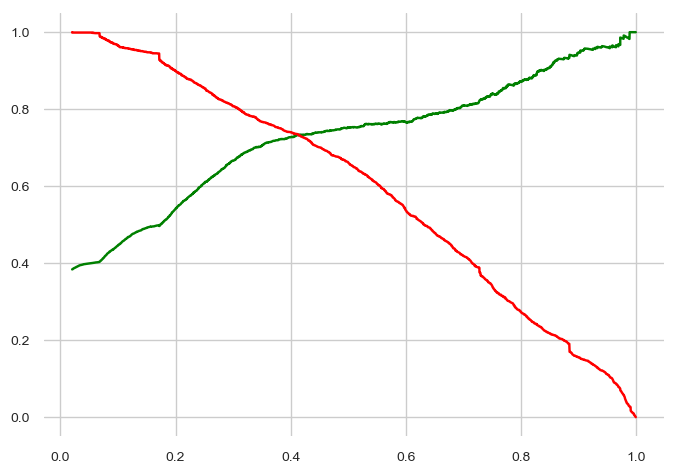

In [105]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<a id="ALS"></a>
### 6.4 Assign Lead Score

In [106]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map(lambda x:round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       True        0.756406       582094    1    1    1    1    1    1    1   
1       True        0.681539       652986    1    1    1    1    1    1    1   
2      False        0.085018       580339    1    0    0    0    0    0    0   
3       True        0.578501       603943    1    1    1    1    1    1    0   
4      False        0.219110       656589    1    1    1    0    0    0    0   

   0.7  0.8  0.9  predicted  Lead Score  
0    1    0    0          1          76  
1    0    0    0          1          68  
2    0    0    0          0           9  
3    0    0    0          1          58  
4    0    0    0          0          22

<a id="MPTS"></a>
## 7. Making predictions on the test set

In [107]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [108]:
X_test = X_test[feature_cols]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
Lead Number                                                           
597640                          0.655570                          0   
606086                          0.845539                          0   
641652                          0.573901                          0   
609351                          0.107856                          0   
607845                          0.009765                          0   

             Current Occupation_Working Professional  \
Lead Number                                            
597640                                             0   
606086                                             0   
641652                                             0   
609351                                             0   
607845                                             0   

             Last Notable Activity_Modified  \
Lead Number                                   
597640                                    0   
606086                                    0   
641652                                    0   
609351                                    1   
607845                                    0   

             Last Notable Activity_Olark Chat Conversation  \
Lead Number                                                  
597640                                                   0   
606086                                                   0   
641652                                                   0   
609351                                                   0   
607845                                                   0   

             Last Notable Activity_Page Visited on Website  Do Not Email_True  
Lead Number                                                                    
597640                                                   0                  0  
606086                                                   0                  0  
641652                                                   0                  0  
609351                                                   0                  0  
607845                                                   0                  0

In [109]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [110]:
y_test_pred = log_4.predict(X_test_sm)

In [111]:
y_test_pred[:10]

Lead Number
597640    0.783231
606086    0.892178
641652    0.716747
609351    0.104436
607845    0.177670
608001    0.597260
657590    0.968484
659875    0.089858
586106    0.800455
630428    0.634787
dtype: float64

In [112]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [113]:
# Let's see the head
y_pred_1.head()

0
Lead Number          
597640       0.783231
606086       0.892178
641652       0.716747
609351       0.104436
607845       0.177670

In [114]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [115]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [116]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [117]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [118]:
y_pred_final.head()

Converted  Lead Number         0
0       True       597640  0.783231
1       True       606086  0.892178
2       True       641652  0.716747
3      False       609351  0.104436
4      False       607845  0.177670

In [119]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [120]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

In [121]:
# Let's see the head of y_pred_final
y_pred_final.head()

Lead Number  Converted  Converted_Prob
0       597640       True        0.783231
1       606086       True        0.892178
2       641652       True        0.716747
3       609351      False        0.104436
4       607845      False        0.177670

In [122]:
y_pred_final['predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [123]:
y_pred_final.head()

Lead Number  Converted  Converted_Prob  predicted
0       597640       True        0.783231          1
1       606086       True        0.892178          1
2       641652       True        0.716747          1
3       609351      False        0.104436          0
4       607845      False        0.177670          0

In [124]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8056440600819299

In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[1074,  247],
       [ 180,  696]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7945205479452054

In [128]:
# Specificity
TN / float(TN+FP)

0.8130204390613172

<font color='blue'>Data Interpretation of Accuracy, Sensitivity and Specificity on Test Data  
 - Accuracy of 81%
 - Sensitivity of 79%
 - Specificity of 81%
 
All our good values (approx. 80%) and consistent with the trained model. Suggesting the model was well trained.

**Assigning Lead Score on Test Data**

In [129]:
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map(lambda x:round(x*100))
y_pred_final.head()

Lead Number  Converted  Converted_Prob  predicted  Lead Score
0       597640       True        0.783231          1          78
1       606086       True        0.892178          1          89
2       641652       True        0.716747          1          72
3       609351      False        0.104436          0          10
4       607845      False        0.177670          0          18

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.